In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [216]:
! pip install imblearn

In [217]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [218]:
import pandas as pd
# Load CSV file
data = pd.read_csv(r"C:\Users\anagh\OneDrive\Desktop\Sem 4\capstone\Canada Tobacco, Nicotine Survey 2023\CSV\Data_Données\pumf.csv")

In [219]:
data.head(2).T

,0,1
PUMFID,65183,65184
TBC_05A,2,2
TBC_05BR,96,96
TBC_10AR,6,6
TBC_10BR,6,6
...,...,...
FIRSTTRR,2,2
DV_ALC30,1,1
DV_CAN30,2,1
WTPP,699.07,1785.51


In [220]:
data.columns

Index(['PUMFID', 'TBC_05A', 'TBC_05BR', 'TBC_10AR', 'TBC_10BR', 'TBC_15',
       'TBC_20R', 'TBC_25QR', 'TBC_30AR', 'TBC_30BR', 'TBC_30CR', 'TBC_30DR',
       'TBC_30ER', 'TBC_30FR', 'TBC_30GR', 'TBC_35', 'TBC_40', 'TBC_41A',
       'TBC_41BR', 'TBC_45AR', 'TBC_45B', 'TBC_45F', 'TBC_45GR', 'TBC_50R',
       'OTP_05AR', 'OTP_05BR', 'OTP_05CR', 'OTP_05DR', 'OTP_05ER', 'VAP_05AR',
       'VAP_05BR', 'VAP_10R', 'VAP_15AR', 'VAP_15BR', 'VAP_15CR', 'VAP_20R',
       'VAP_21R', 'VAP_30R', 'VAP_35R', 'VAP_40AR', 'VAP_40BR', 'VAP_40HR',
       'VAP_41AR', 'VAP_41BR', 'VAP_41IR', 'VAP_45R', 'VAP_60', 'CAN_05A',
       'CAN_05BR', 'CAN_10A', 'CAN_10BR', 'CAN_15AR', 'CAN_15BR', 'CAN_17R',
       'CAN_20A', 'CAN_20BR', 'CAN_25AR', 'CAN_25BR', 'CAN_30AR', 'CAN_30BR',
       'CAN_30CR', 'CAN_30G', 'IU_05R', 'ALC_05', 'ALC_10R', 'GENDER',
       'AGEGROUP', 'PROV_C', 'ED_05R', 'INDFLGR', 'PGDVFLR', 'SORFLGR',
       'LTC_10R', 'GEN_01', 'GEN_05', 'DV_SS', 'DV_SSB', 'CIGWAVR', 'DV_VP30R',
       'DVVP3

In [221]:
# Renaming feature names
# Dictionary mapping variable codes to descriptions (extracted from PDF)
column_mapping = {
    "PUMFID": "Random ID",
    "TBC_05A": "Smoked a cigarette - lifetime",
    "TBC_05BR": "Age first time smoked whole cigarette",
    "TBC_10AR": "Frequency smoked cigarettes - past 30 days",
    "TBC_10BR": "Days smoked per week - past 30 days",
    "TBC_15": "Smoked at least 100 cigarettes - lifetime",
    "TBC_20R": "When stopped smoking cigarettes",
    "TBC_25QR": "Month stopped smoking",
    "TBC_30AR": "Number of cigarettes smoked - Day 1",
    "TBC_30BR": "Number of cigarettes smoked - Day 2",
    "TBC_30CR": "Number of cigarettes smoked - Day 3",
    "TBC_30DR": "Number of cigarettes smoked - Day 4",
    "TBC_30ER": "Number of cigarettes smoked - Day 5",
    "TBC_30FR": "Number of cigarettes smoked - Day 6",
    "TBC_30GR": "Number of cigarettes smoked - Day 7",
    "TBC_35": "Times stopped smoking - past 12 months",
    "TBC_40": "Tried quitting by switching to vaping",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "DV_SS": "Smoking Status (3 levels)"
}
# Rename columns
data.rename(columns=column_mapping, inplace=True)


data.head(2)


,Random ID,Smoked a cigarette - lifetime,Age first time smoked whole cigarette,Frequency smoked cigarettes - past 30 days,Days smoked per week - past 30 days,Smoked at least 100 cigarettes - lifetime,When stopped smoking cigarettes,Month stopped smoking,Number of cigarettes smoked - Day 1,Number of cigarettes smoked - Day 2,...,DV_VP30R,DVVP30BR,DVCAN30B,DV_VC30,DV_VC30B,FIRSTTRR,DV_ALC30,DV_CAN30,WTPP,VERDATE
0,65183,2,96,6,6,6,6,96,96,96,...,2,3,3,2,3,2,1,2,699.07,1-Feb-24
1,65184,2,96,6,6,6,6,96,96,96,...,2,3,2,1,2,2,1,1,1785.51,1-Feb-24


In [222]:
# Rename remaining feature names
column_mapping = {
    "TBC_41A": "Used vaping device with nicotine",
    "TBC_41BR": "Used vaping device without nicotine/unknown",
    "TBC_45AR": "Did to quit smoking - Deal with friend/family or used app",
    "TBC_45B": "Did to quit smoking - Reduced cigarettes smoked",
    "TBC_45F": "Did to quit smoking - Tried to quit on own",
    "TBC_45GR": "Did to quit smoking - Other",
    "TBC_50R": "Used nicotine replacement products",
    "OTP_05AR": "Frequency smoked - Little cigars/cigarillos - past 30 days",
    "OTP_05BR": "Frequency smoked - Cigars - past 30 days",
    "OTP_05CR": "Frequency smoked - Tobacco in traditional pipe - past 30 days",
    "OTP_05DR": "Frequency smoked - Chewing tobacco/snuff - past 30 days",
    "OTP_05ER": "Frequency smoked - Tobacco water-pipe - past 30 days",
    "VAP_05AR": "Tried vaping - lifetime",
    "VAP_05BR": "Age first time tried vaping",
    "VAP_10R": "Frequency vaped - past 30 days",
    "VAP_15AR": "Days vaped e-liquid with nicotine - past 30 days",
    "VAP_15BR": "Days vaped e-liquid without nicotine - past 30 days",
    "VAP_15CR": "Days vaped e-liquid unknown content - past 30 days",
    "VAP_20R": "Times picked up vaping device - days vaped",
    "VAP_21R": "Puffs taken each time vaping device is picked up",
    "VAP_30R": "Flavour vaped most often",
    "VAP_35R": "Main reason for vaping - currently",
    "VAP_40AR": "Where get vaping devices - Vape shop",
    "VAP_40BR": "Where get vaping devices - Store or online",
    "VAP_40HR": "Where get vaping devices - Other",
    "VAP_41AR": "Where get vaping liquids - Vape shop",
    "VAP_41BR": "Where get vaping liquids - Store or online",
    "VAP_41IR": "Where get vaping liquids - Other",
    "VAP_45R": "Times stopped vaping - past 12 months",
    "VAP_60": "Perception of harm - Vaping vs cigarettes",
    "CAN_05A": "Smoked cannabis - lifetime",
    "CAN_05BR": "Age first time smoked cannabis",
    "CAN_10A": "Frequency smoked cannabis - past 30 days",
    "CAN_10BR": "Days smoked cannabis at least once - past 30 days",
    "CAN_15AR": "Frequency smoked cannabis/tobacco mix - past 30 days",
    "CAN_15BR": "Days smoked cannabis/tobacco mix - past 30 days",
    "CAN_17R": "Frequency consumed cannabis edibles - past 30 days",
    "CAN_20A": "Vaped cannabis - lifetime",
    "CAN_20BR": "Age first time vaped cannabis",
    "CAN_25AR": "Frequency vaped cannabis - past 30 days",
    "CAN_25BR": "Days vaped cannabis at least once - past 30 days",
    "CAN_30AR": "Where get cannabis device/liquid - Store/Online",
    "CAN_30BR": "Where get cannabis devices/liquids - Family/Acquaintance",
    "CAN_30CR": "Where get cannabis devices/liquids - Other",
    "CAN_30G": "Where get cannabis devices/liquids - A friend",
    "IU_05R": "Tried first substance",
    "ALC_05": "Drank alcohol - past 30 days",
    "ALC_10R": "Drank 4+ drinks on one occasion - past 12 months",
    "GENDER": "Gender",
    "AGEGROUP": "Age Group",
    "PROV_C": "Province of Residence",
    "ED_05R": "Highest certificate/diploma/degree completed",
    "INDFLGR": "Indigenous identity flag",
    "PGDVFLR": "Visible minority flag",
    "SORFLGR": "Sexual identity flag",
    "LTC_10R": "Person with disability (self-declared)",
    "GEN_01": "Perceived health",
    "GEN_05": "Perceived mental health",
    "DV_SS": "Smoking Status (3 levels)",
    "DV_SSB": "Smoking Status (4 levels)",
    "CIGWAVR": "Avg cigarettes smoked per day (weekly basis)",
    "DV_VP30R": "Vaped in the past 30 days (2 levels)",
    "DVVP30BR": "Vaped in the past 30 days (3 levels)",
    "DVCAN30B": "Cannabis smoked in the past 30 days (3 levels)",
    "DV_VC30": "Vaped cannabis in the past 30 days (2 levels)",
    "DV_VC30B": "Vaped cannabis in the past 30 days (3 levels)",
    "FIRSTTRR": "First product tried",
    "DV_ALC30": "Consumed alcohol in the past 30 days",
    "DV_CAN30": "Cannabis smoked in the past 30 days (2 levels)",
    "WTPP": "Survey weight - PUMF",
    "VERDATE": "Date of file creation"
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)


In [223]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

# DEEP DIVE INTO FEATURES

### TARGET VARIABLE (SMOKING STATUS (3 LEVELS))

In [224]:
# Target variable 
data["Smoking Status (3 levels)"].replace({1:"Current Smoker",2:"Former Smoker",3:"Never Smoked",9:"Not stated"}).value_counts()

Smoking Status (3 levels)
Never Smoked      8662
Former Smoker     2271
Current Smoker    1198
Not stated           2
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

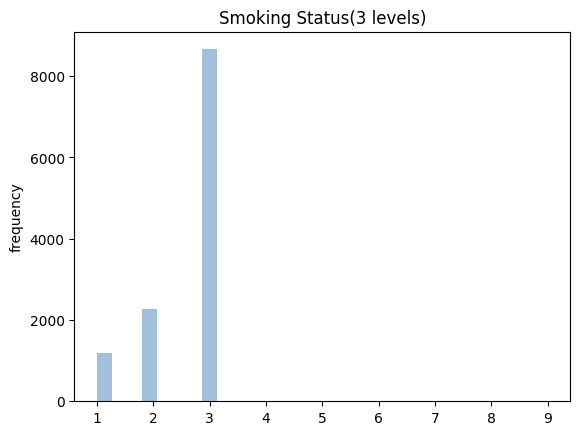

In [225]:
plt.hist(data["Smoking Status (3 levels)"], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
plt.title("Smoking Status(3 levels)")
plt.ylabel("frequency")

In [226]:
# logically the number of people who answered "no" for smoked cigarette ina lifetime is equal to "Never smoked " + "Not stated"

In [227]:
# Respondents who has smoked tobacco in their lifetime
data["Smoked a cigarette - lifetime"].replace({1:"yes",2:"No"}).value_counts()

Smoked a cigarette - lifetime
No     7270
yes    4863
Name: count, dtype: int64

In [228]:
# But here it does not tally up

In [229]:
data[data["Smoked a cigarette - lifetime"]==2]["Smoking Status (3 levels)"].value_counts()
# those who answered no for Smoked a cigarette - lifetime--> they all are categorised as non-smoker

Smoking Status (3 levels)
3    7270
Name: count, dtype: int64

In [230]:
# non smokers and not stated respondents answers
data[data["Smoking Status (3 levels)"].isin([3,9])]["Smoked a cigarette - lifetime"].value_counts()

Smoked a cigarette - lifetime
2    7270
1    1394
Name: count, dtype: int64

In [231]:
data.loc[
    data["Smoking Status (3 levels)"].isin([3, 9]) & 
    (data["Smoked a cigarette - lifetime"] == 1),
][["Smoked a cigarette - lifetime","Smoking Status (3 levels)"]]
# some non smokers answered yes for Smoked a cigarette - lifetime

,Smoked a cigarette - lifetime,Smoking Status (3 levels)
7,1,3
13,1,3
33,1,3
36,1,3
41,1,3
...,...,...
12113,1,3
12115,1,3
12121,1,3
12128,1,3


In [232]:
# looking further we saw that some non-smokers and not stated respondents answered that they have used a cigarette in lifetime , this is contradictory.
# as smoking status is a derived variable, the error might be due to the way it's derived or the ambiquity of the question "Have you ever smoked a whole cigarette?", they might have smoked just few puffs and never completed a whole cigarette 

In [233]:
# as the data is derived they might have only considered  smokers with frequent use as smoker

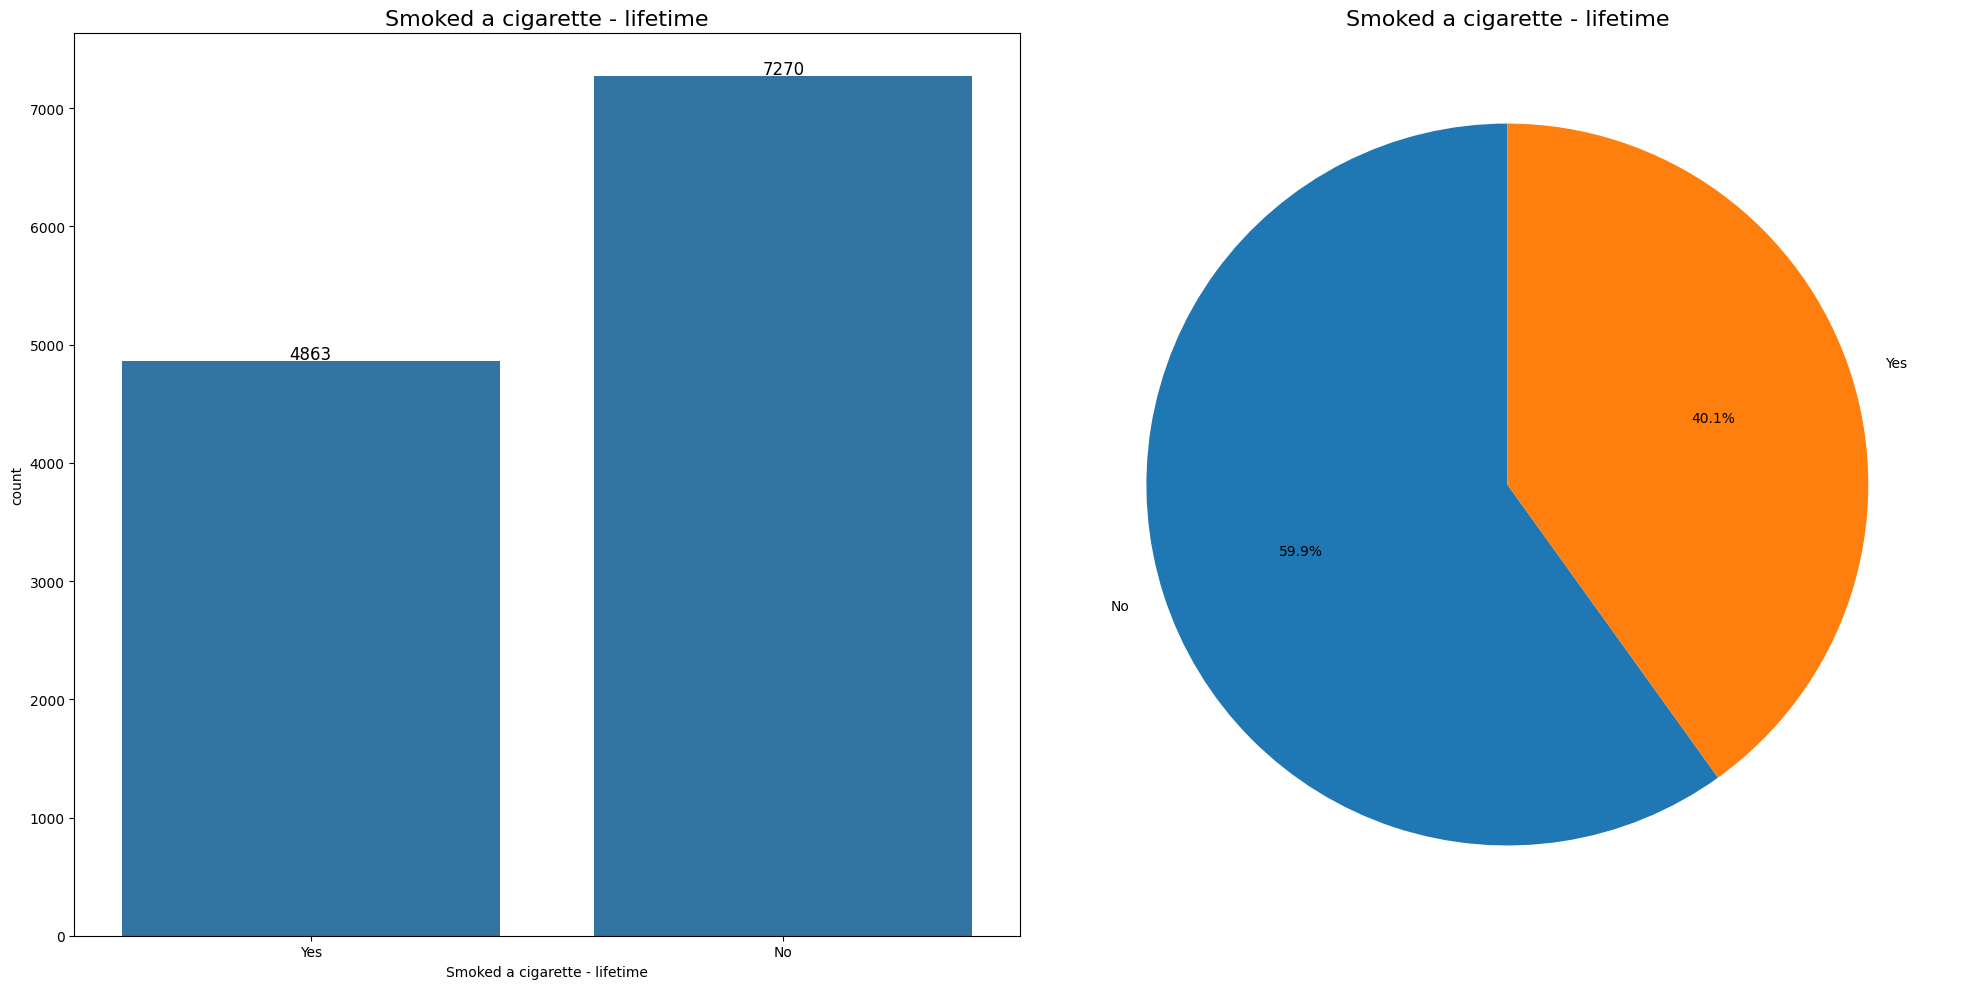

In [234]:
# smoked canabis
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Smoked a cigarette - lifetime", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1]) 
ax.set_xticklabels(["Yes", "No"]) 
plt.title('Smoked a cigarette - lifetime', fontsize=16)

plt.subplot(1,2,2)
TBC_counts = data["Smoked a cigarette - lifetime"].value_counts()
# Plot the pie chart
plt.pie(TBC_counts, labels=["No","Yes"], autopct='%1.1f%%',startangle=90)
plt.title('Smoked a cigarette - lifetime', fontsize=16)


plt.tight_layout()
plt.show()

In [235]:
# The target variable is dependent on Smoked a cigarette - lifetime, Frequency smoked cigarettes - past 30 days, Smoked at least 100 cigarettes - lifetime
# Maybe remove these variables before traing the machine learning model

## Demographic Features

In [236]:
# Demographic variables
Dem_var=['Age Group', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)', 'Smoking Status (3 levels)']

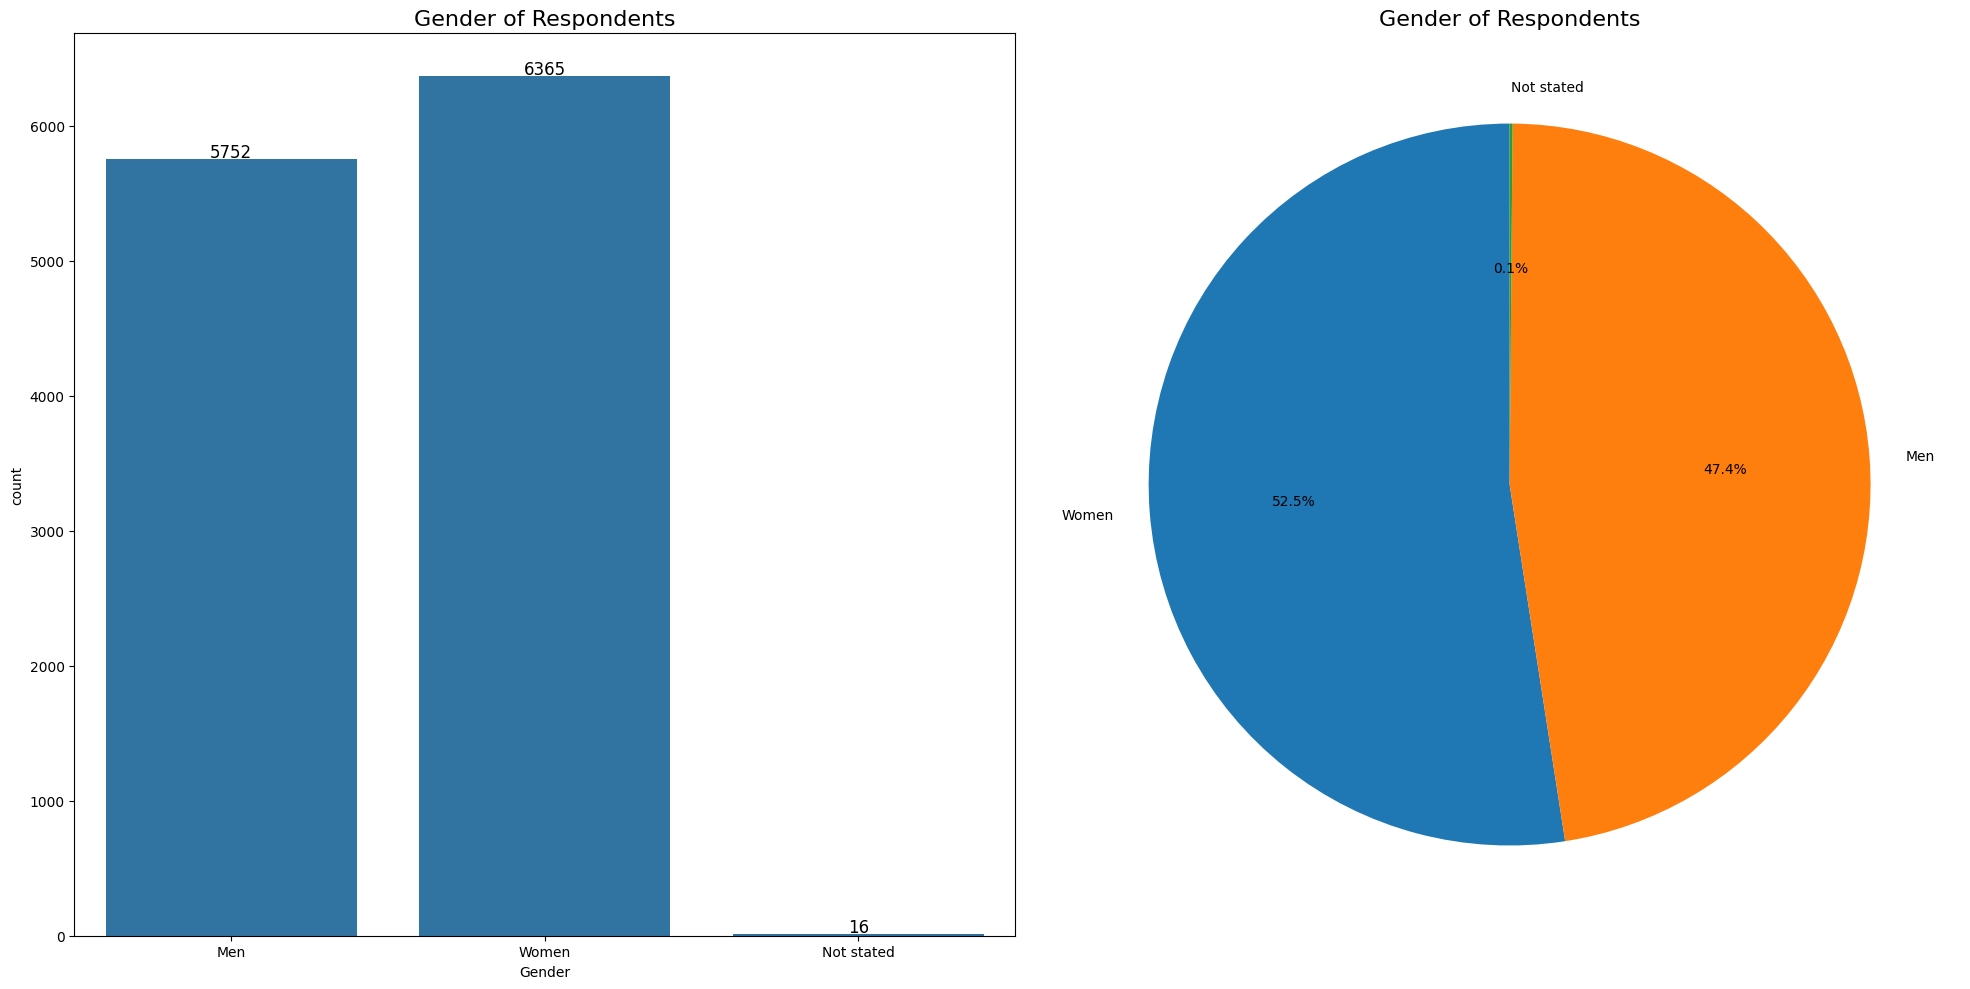

In [237]:
# Respondents
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Gender", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Men", "Women","Not stated"]) 
plt.title('Gender of Respondents', fontsize=16)

plt.subplot(1,2,2)
Gender_counts = data["Gender"].value_counts()
# Plot the pie chart
plt.pie(Gender_counts, labels=["Women","Men","Not stated"], autopct='%1.1f%%',startangle=90)
plt.title('Gender of Respondents', fontsize=16)


plt.tight_layout()
plt.show()

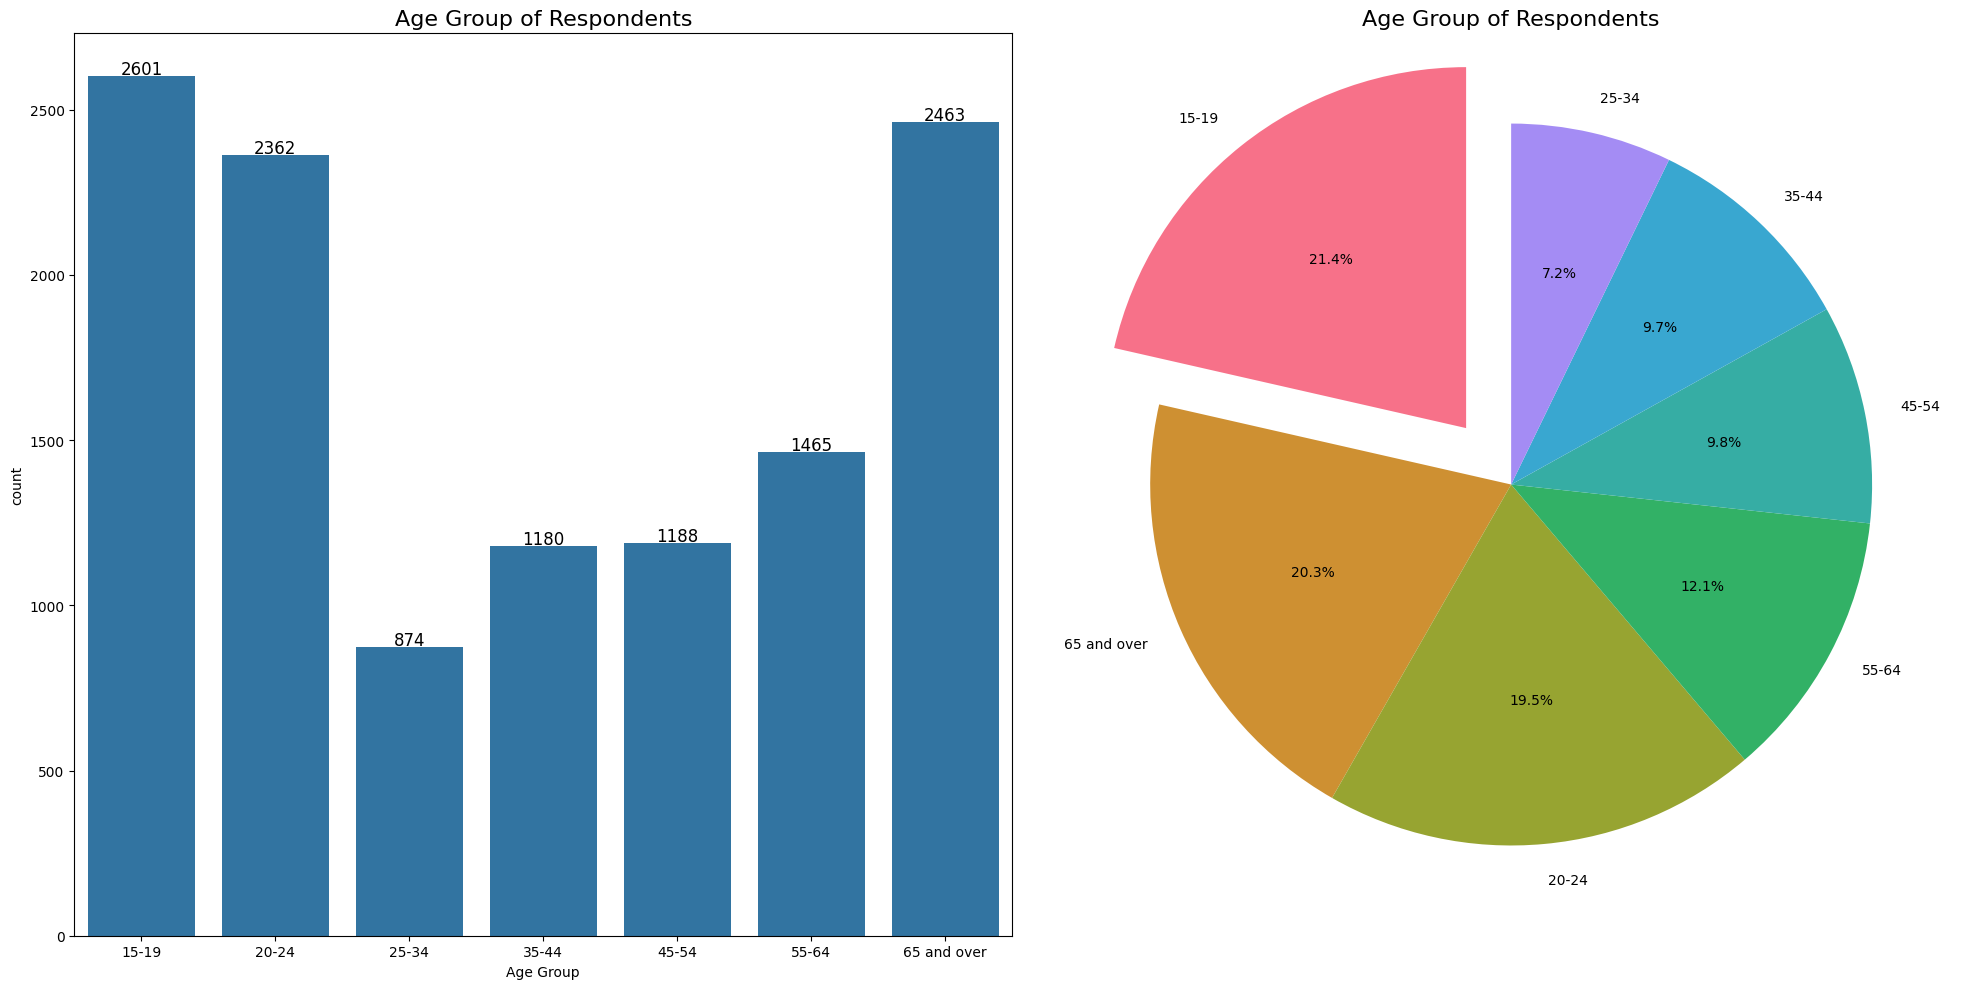

In [238]:
# Respondents (Agegroup)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Age Group", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
ax.set_xticks(range(7))
ax.set_xticklabels(["15-19", "20-24","25-34","35-44","45-54","55-64","65 and over"]) 
plt.title('Age Group of Respondents', fontsize=16)

plt.subplot(1,2,2)
Age_group_counts = data["Age Group"].value_counts()
# Plot the pie chart
plt.pie(Age_group_counts, labels=["15-19", "65 and over", "20-24", "55-64", "45-54","35-44", "25-34"], autopct='%1.1f%%',startangle=90,explode = [0.2,0,0,0,0,0,0], colors = sns.color_palette("husl", 8))
plt.title('Age Group of Respondents', fontsize=16)


plt.tight_layout()
plt.show()

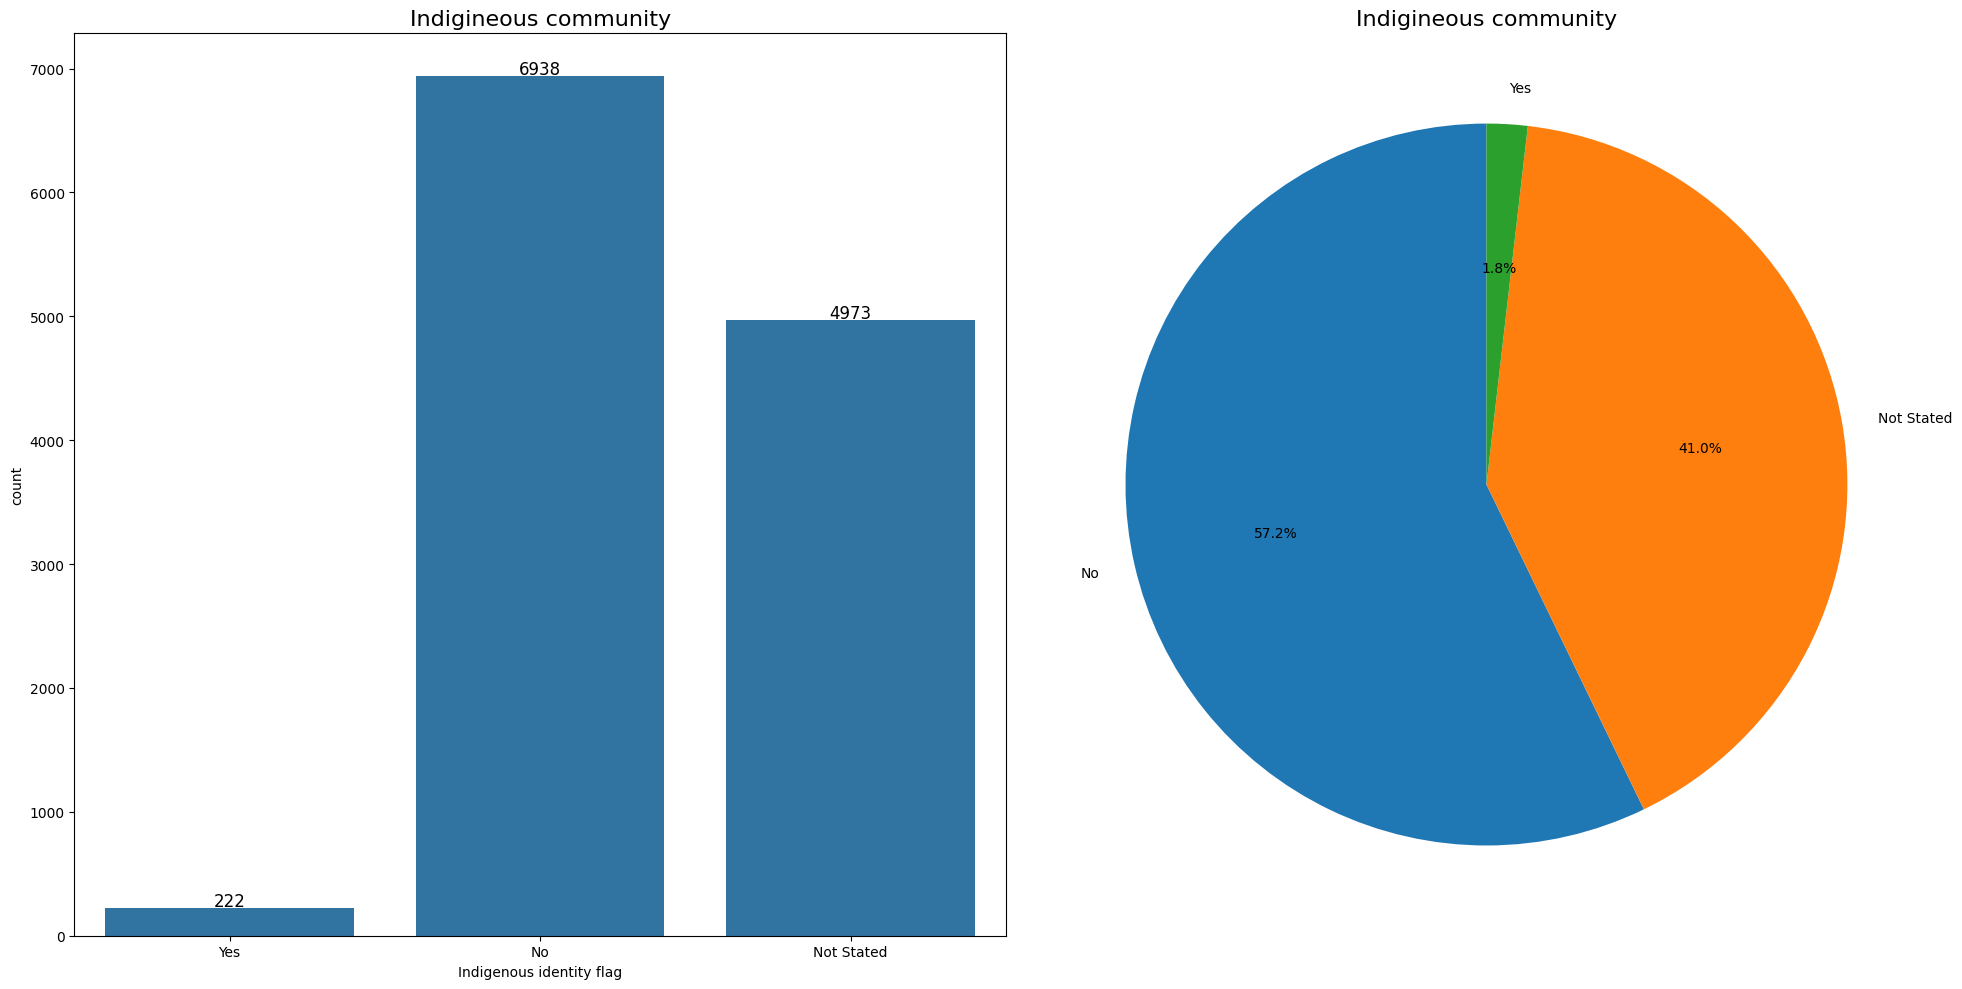

In [239]:
# Respondents (indigeneous flag)
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
ax=sns.countplot(x="Indigenous identity flag", data=data)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xticks([0, 1,2]) 
ax.set_xticklabels(["Yes", "No","Not Stated"]) 
plt.title('Indigineous community', fontsize=16)

plt.subplot(1,2,2)
Ind_counts = data["Indigenous identity flag"].value_counts()
# Plot the pie chart
plt.pie(Ind_counts, labels=["No","Not Stated","Yes"], autopct='%1.1f%%',startangle=90)
plt.title('Indigineous community', fontsize=16)


plt.tight_layout()
plt.show()

## CORRELATION (Demographic features and target variable)

In [240]:
# for correlation lets use cramers(nominal) categorical values

In [241]:
data=data[data["Smoking Status (3 levels)"].isin([1,2])]

In [242]:
data

,Random ID,Smoked a cigarette - lifetime,Age first time smoked whole cigarette,Frequency smoked cigarettes - past 30 days,Days smoked per week - past 30 days,Smoked at least 100 cigarettes - lifetime,When stopped smoking cigarettes,Month stopped smoking,Number of cigarettes smoked - Day 1,Number of cigarettes smoked - Day 2,...,Vaped in the past 30 days (2 levels),Vaped in the past 30 days (3 levels),Cannabis smoked in the past 30 days (3 levels),Vaped cannabis in the past 30 days (2 levels),Vaped cannabis in the past 30 days (3 levels),First product tried,Consumed alcohol in the past 30 days,Cannabis smoked in the past 30 days (2 levels),Survey weight - PUMF,Date of file creation
16,65199,1,3,2,2,1,6,96,0,1,...,2,3,1,2,3,3,1,1,6025.85,1-Feb-24
17,65200,1,1,1,6,1,6,96,2,2,...,2,3,3,2,3,9,2,2,8807.62,1-Feb-24
20,65203,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,2,2,721.10,1-Feb-24
22,65205,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,3746.68,1-Feb-24
23,65206,1,2,1,6,1,6,96,0,0,...,2,3,3,2,3,1,1,2,439.21,1-Feb-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,77305,1,3,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,2789.84,1-Feb-24
12127,77310,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,2474.72,1-Feb-24
12129,77312,1,2,4,6,1,3,96,96,96,...,2,3,3,2,3,1,1,2,1494.33,1-Feb-24
12130,77313,1,2,4,6,1,3,96,96,96,...,1,1,1,1,1,3,1,1,1728.73,1-Feb-24


In [243]:
#cramer's fn
# Function to calculate Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [244]:
dem_data=data[Dem_var]

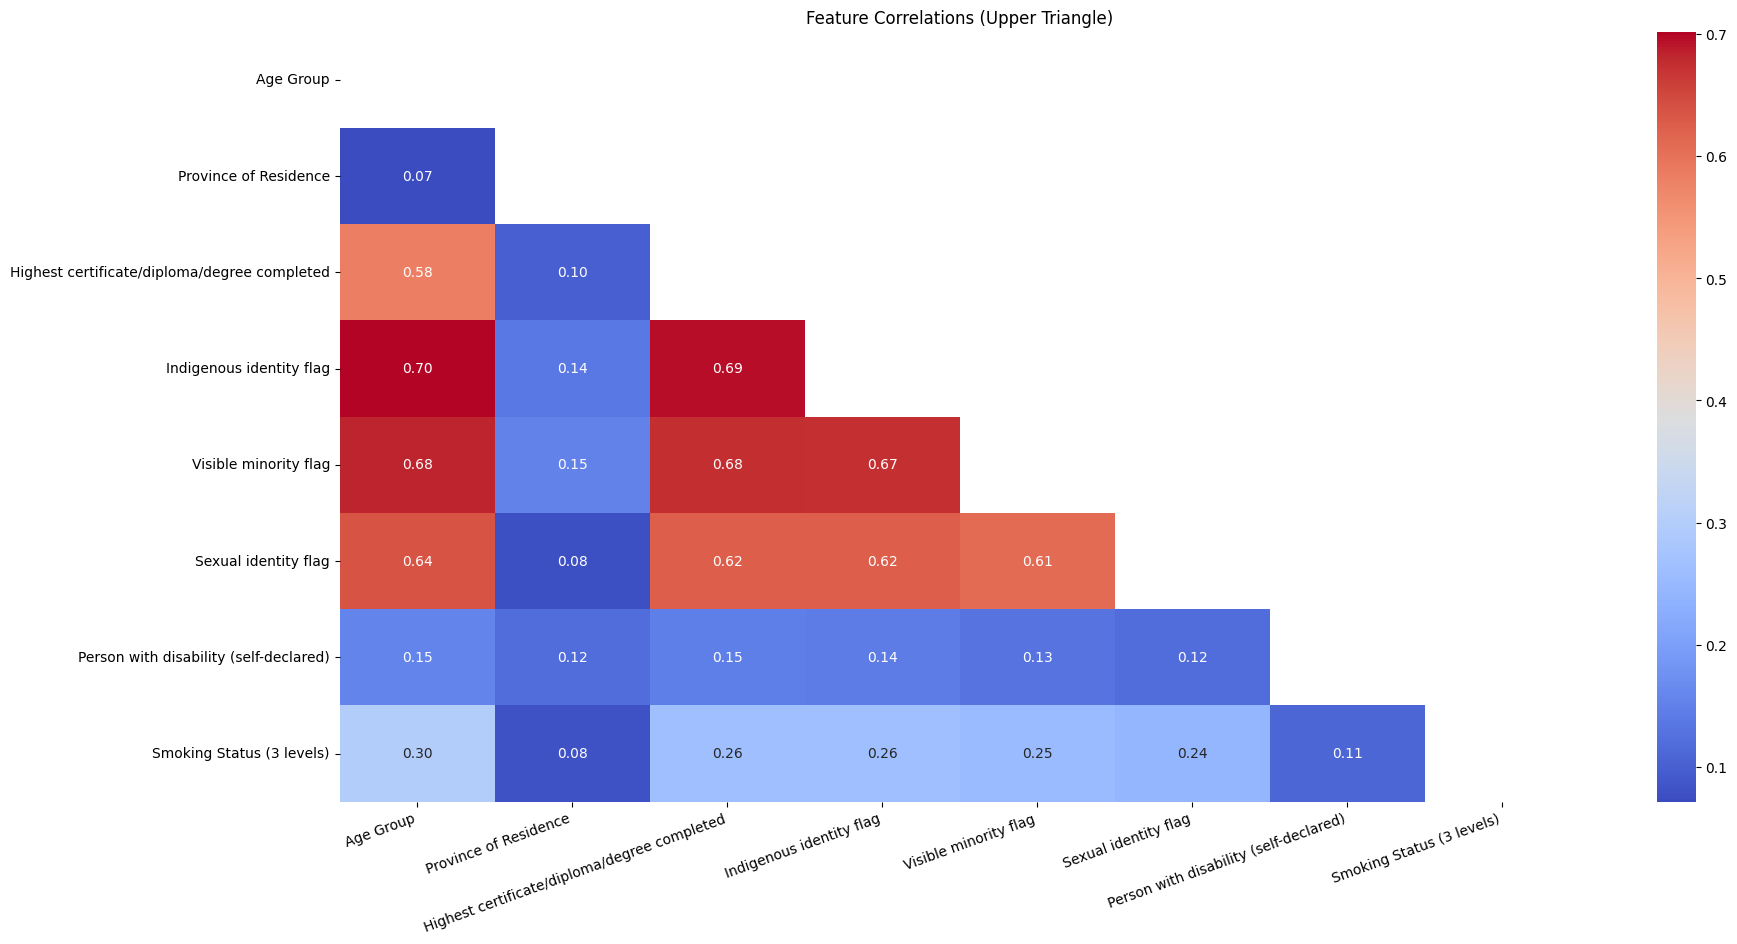

In [245]:
# Mask the lower triangle
dem_data_numeric = dem_data.select_dtypes(include=["number"])

cols = dem_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(dem_data_numeric[cols[i]], dem_data_numeric[cols[j]])


mask = np.triu(np.ones_like(cv_arr, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(cv_arr, columns=cols, index=cols), 
            annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Feature Correlations (Upper Triangle)")
# Rotate x-axis labels for better visibility
plt.xticks(rotation=20, ha='right')  # Rotate by 45 degrees, align to the right
plt.yticks(rotation=0)  # Keep y-axis labels straight
plt.show()

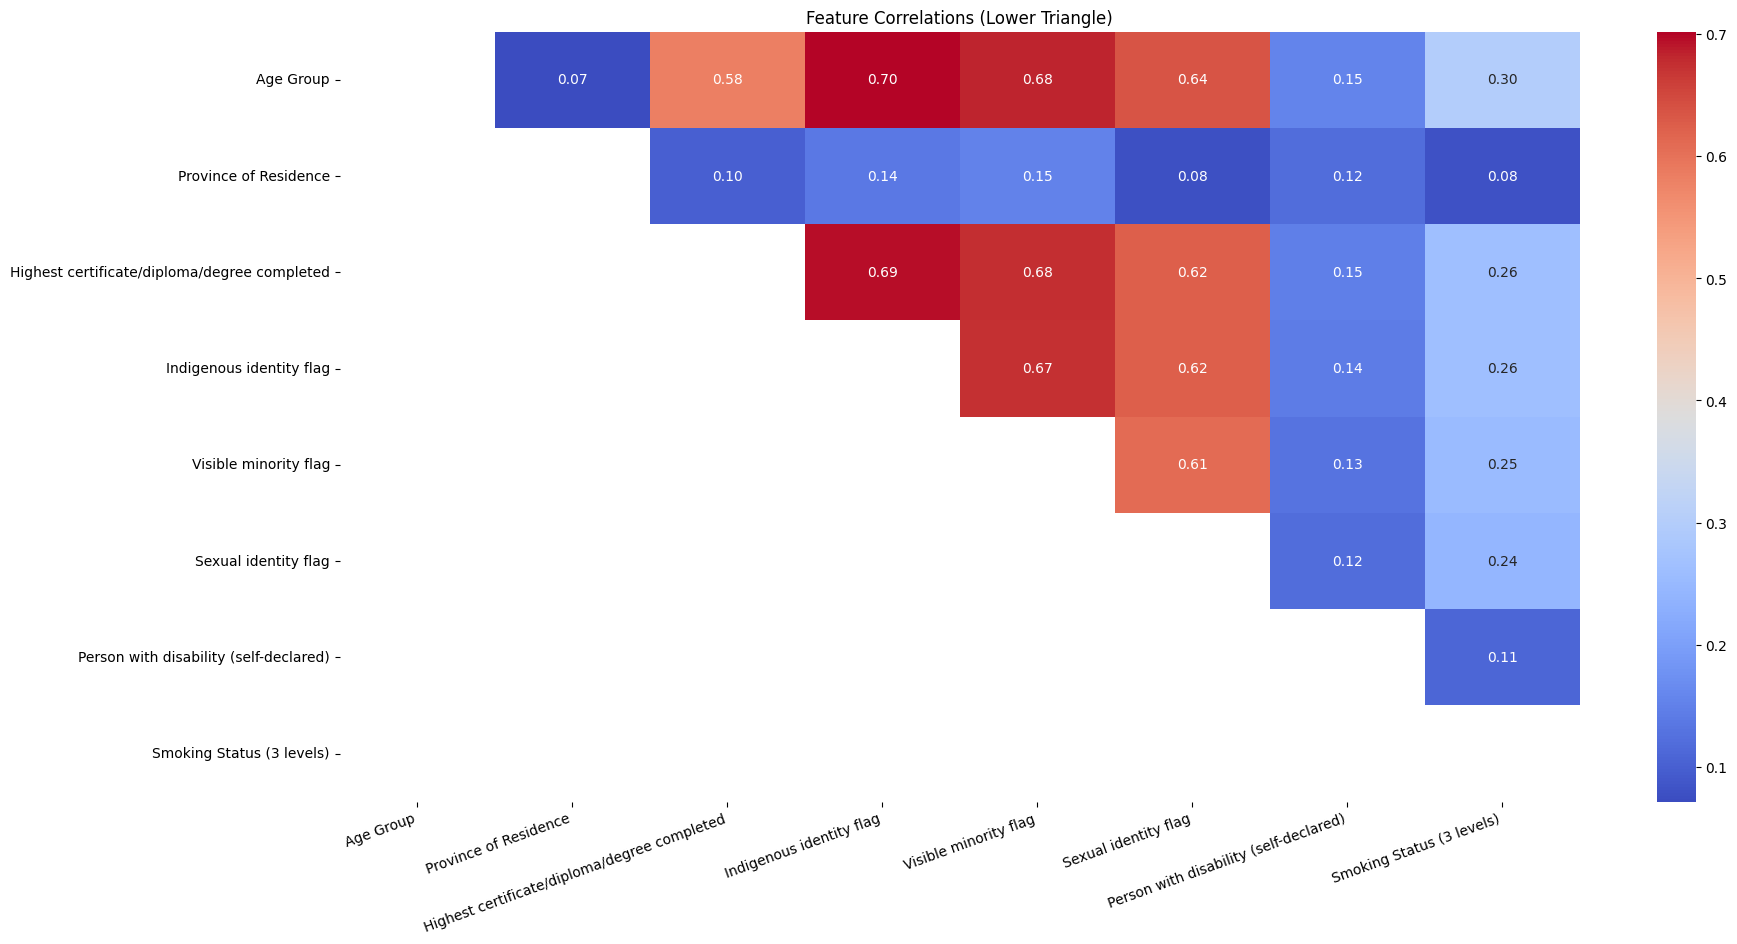

In [246]:
# Mask the upper triangle
mask = np.tril(np.ones_like(cv_arr, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(cv_arr, columns=cols, index=cols), 
            annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Feature Correlations (Lower Triangle)")
# Rotate x-axis labels for better visibility
plt.xticks(rotation=20, ha='right')  # Rotate by 45 degrees, align to the right
plt.yticks(rotation=0)  # Keep y-axis labels straight
plt.show()


In [247]:
# Age group, Highest certificate/diploma/degree completed,Indigenous identity flag,Visible minority flag,Sexual identity flag  has the most correlation between smoking status

# Tobacco Consumption Behaviours

In [248]:
# tobacco use behaviours
#lets remove the three dependent variables from the data
# the other variables such as number of cigarettes smokd in past 7 days are removed as those can influence the model

In [249]:
data.groupby("Times stopped smoking - past 12 months")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Times stopped smoking - past 12 months,,
1,732.0,16.0
2,143.0,45.0
3,164.0,30.0
4,150.0,20.0
6,NaN,2155.0
9,9.0,5.0


In [250]:
tob_features=[#'Smoked a cigarette - lifetime',
       #'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       #'Tried quitting by switching to vaping',
       #'Used vaping device with nicotine',
       #'Used vaping device without nicotine/unknown',
       #'Did to quit smoking - Deal with friend/family or used app',
       #'Did to quit smoking - Reduced cigarettes smoked',
       #'Did to quit smoking - Tried to quit on own',
       #'Did to quit smoking - Other', 'Used nicotine replacement products',
       'Frequency smoked - Little cigars/cigarillos - past 30 days',
       'Frequency smoked - Cigars - past 30 days',
       'Frequency smoked - Tobacco in traditional pipe - past 30 days',
       'Frequency smoked - Chewing tobacco/snuff - past 30 days',
       'Frequency smoked - Tobacco water-pipe - past 30 days','Smoking Status (3 levels)']

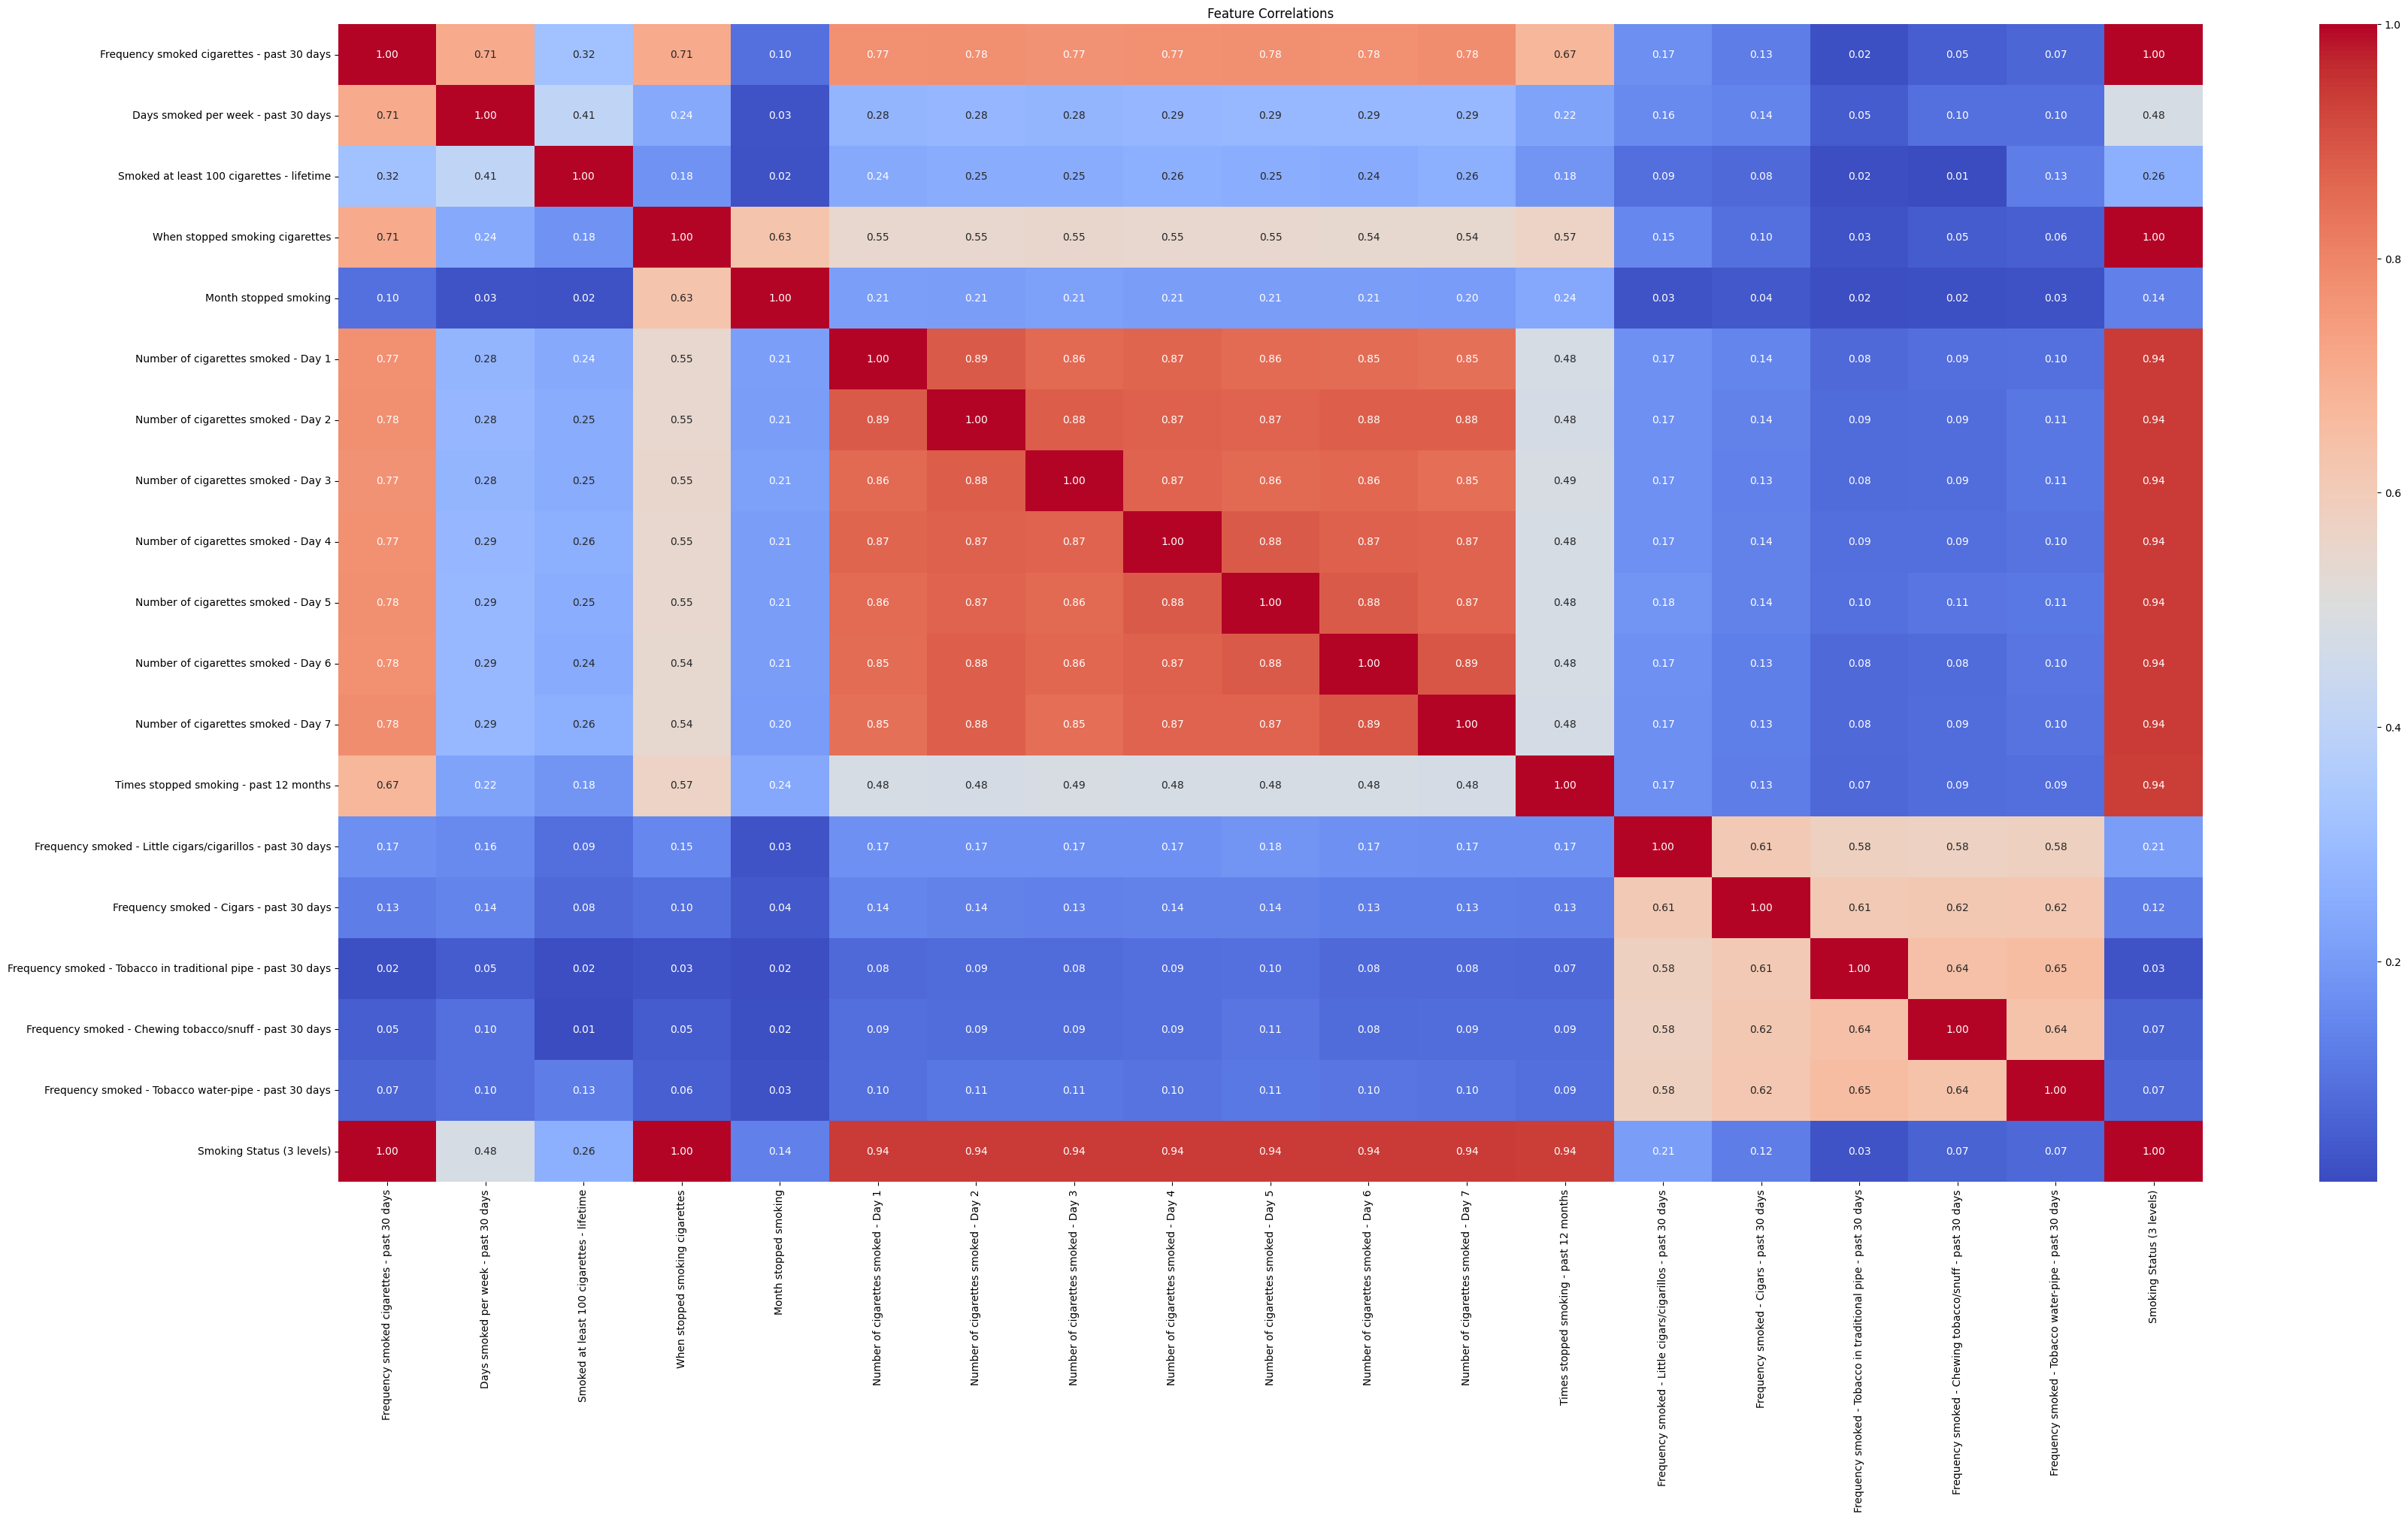

In [251]:


tob_data=data[tob_features]

# Convert categorical columns to numeric if necessary
tob_data_numeric = tob_data.select_dtypes(include=["number"])
cols = tob_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(tob_data_numeric[cols[i]], tob_data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

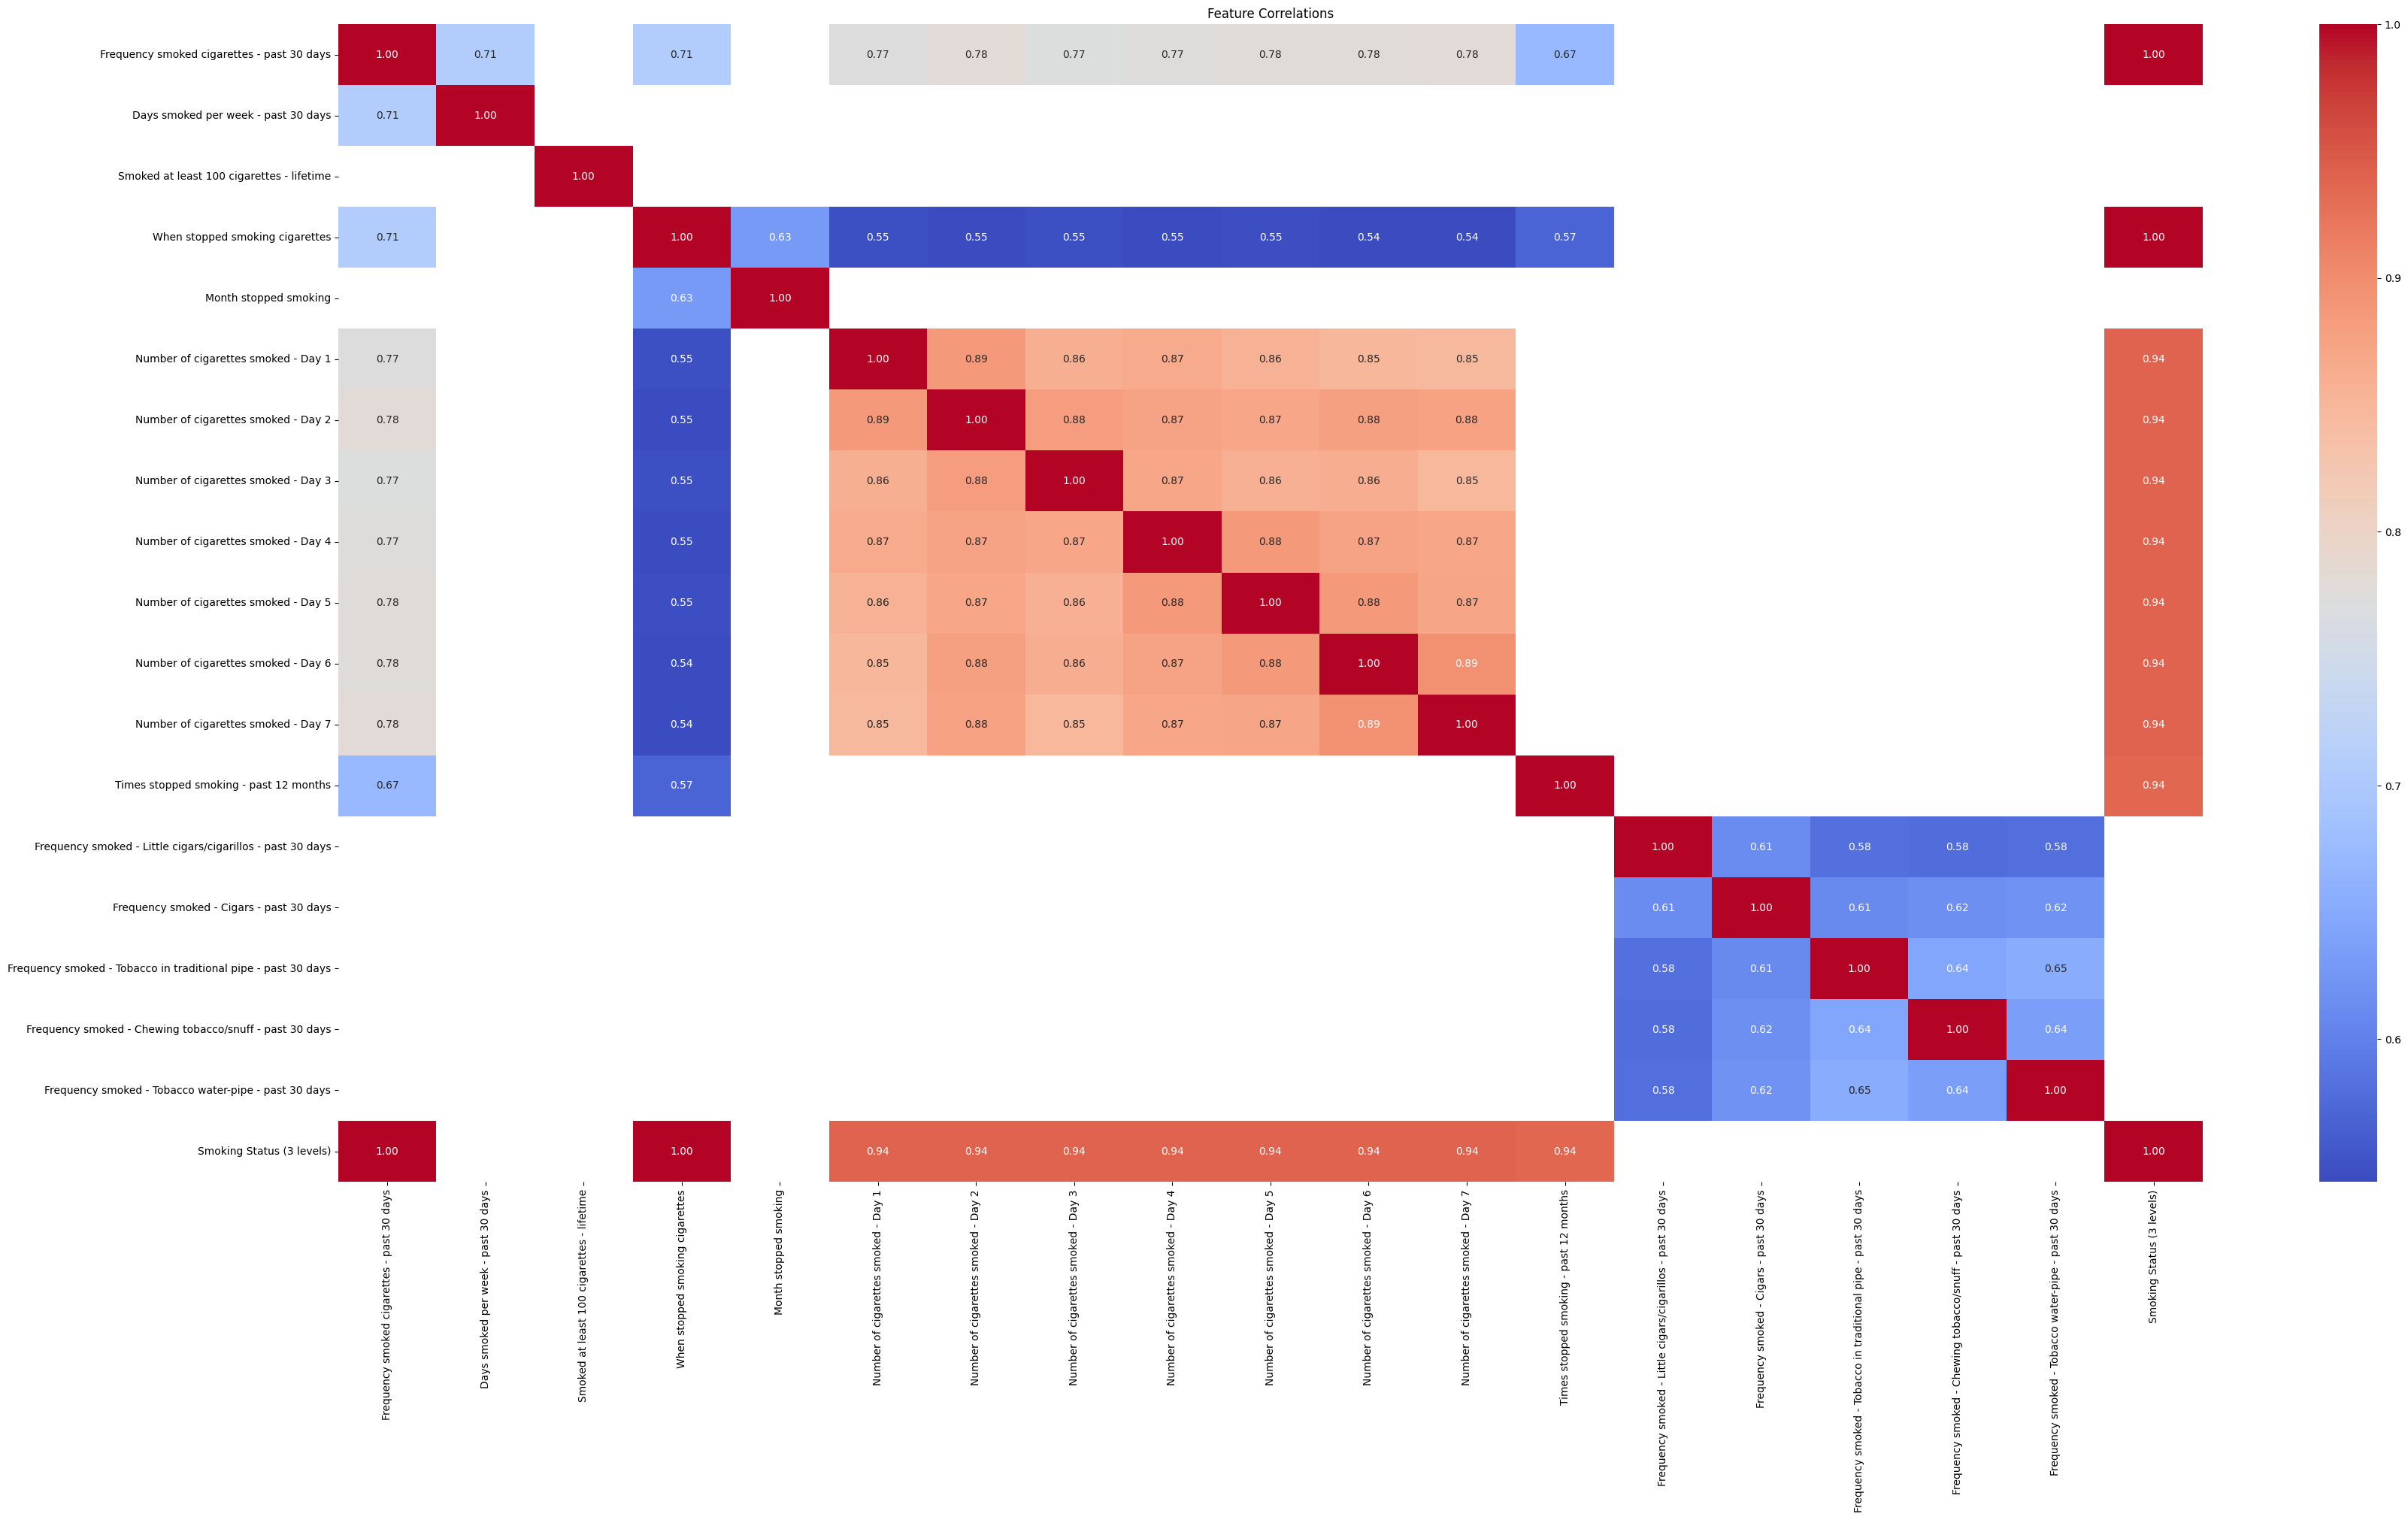

In [252]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[abs(cv_data) > 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [253]:
tob_features=[#'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       #'Frequency smoked cigarettes - past 30 days',
       #'Days smoked per week - past 30 days',
       #'Smoked at least 100 cigarettes - lifetime',
       #'When stopped smoking cigarettes', 'Month stopped smoking',
       #'Number of cigarettes smoked - Day 1',
       #'Number of cigarettes smoked - Day 2',
       #'Number of cigarettes smoked - Day 3',
       #'Number of cigarettes smoked - Day 4',
       #'Number of cigarettes smoked - Day 5',
       #'Number of cigarettes smoked - Day 6',
       #'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to quit on own',
       'Did to quit smoking - Other', 'Used nicotine replacement products',
       #'Frequency smoked - Little cigars/cigarillos - past 30 days',
       #'Frequency smoked - Cigars - past 30 days',
       #'Frequency smoked - Tobacco in traditional pipe - past 30 days',
       #'Frequency smoked - Chewing tobacco/snuff - past 30 days',
       #'Frequency smoked - Tobacco water-pipe - past 30 days',
       'Smoking Status (3 levels)']

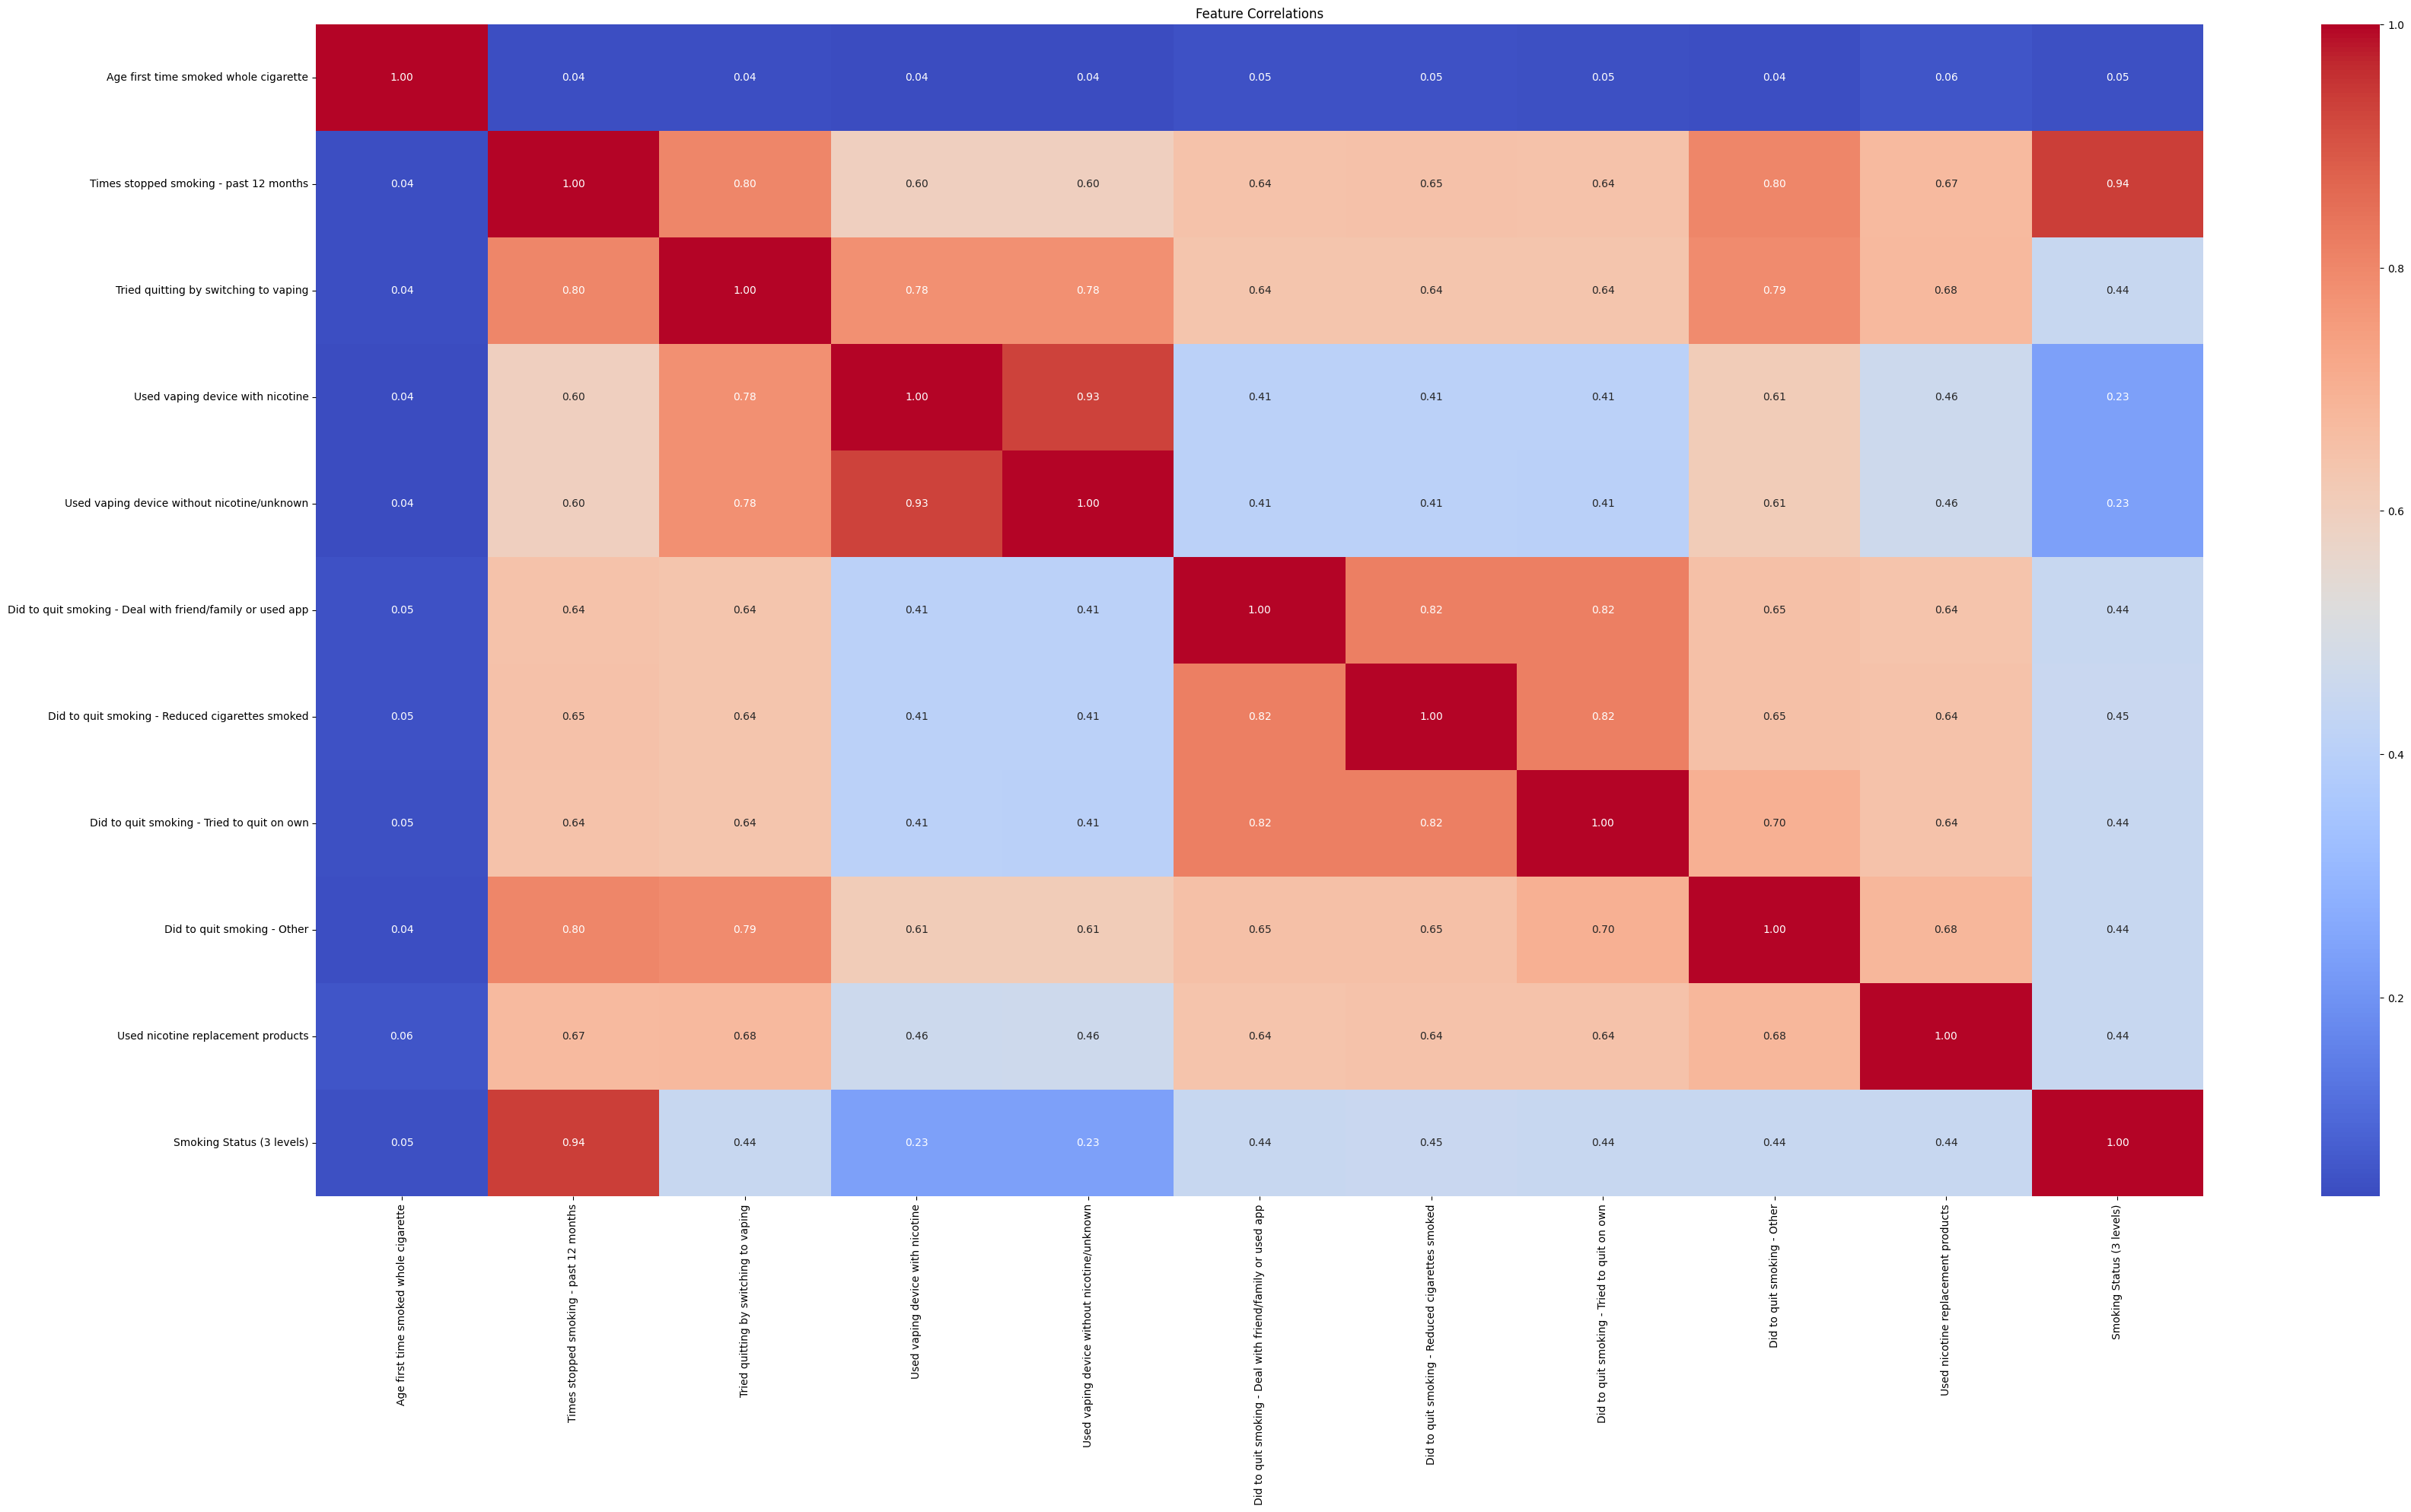

In [254]:

tob_data=data[tob_features]
# Convert categorical columns to numeric if necessary
tob_data_numeric = tob_data.select_dtypes(include=["number"])

cols = tob_data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(tob_data_numeric[cols[i]], tob_data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

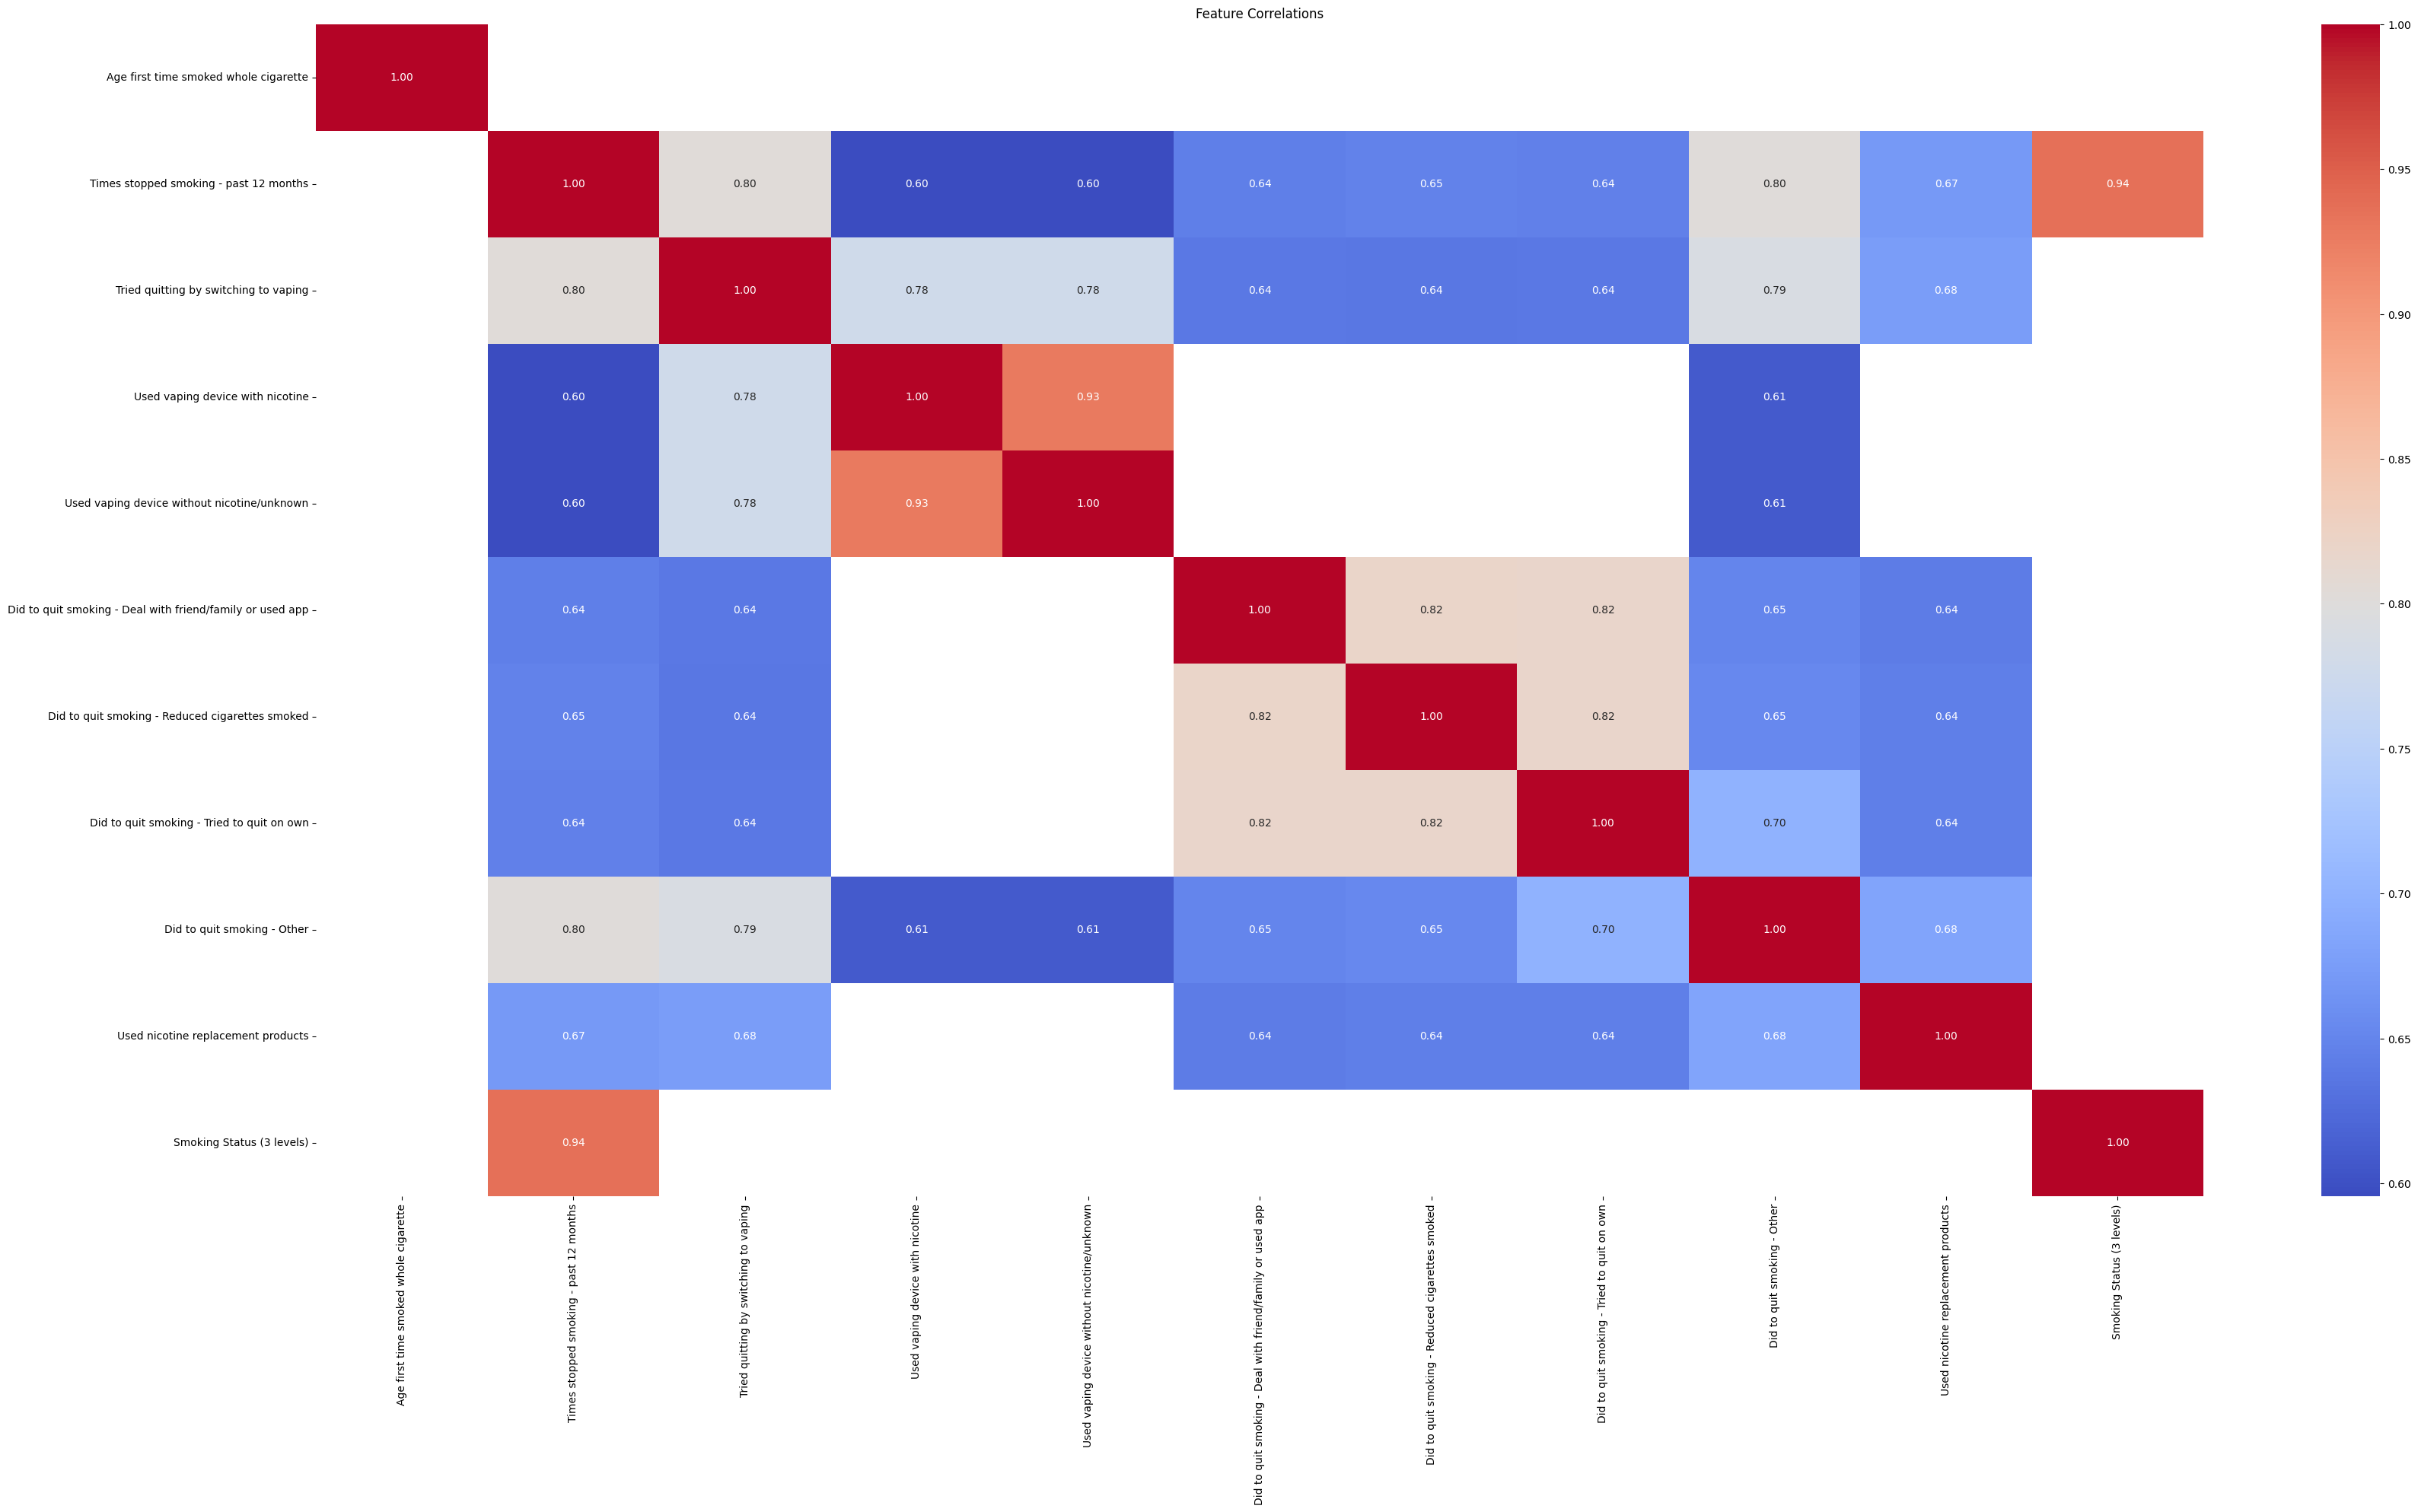

In [255]:
cv_data = pd.DataFrame(cv_arr, columns = cols, index = cols)
cv_data = cv_data[abs(cv_data )> 0.5]

plt.figure(figsize=(40, 20))
sns.heatmap(cv_data, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# Modelling

In [256]:
data=data.drop(["Date of file creation"],axis=1)#"Survey weight - PUMF"]

In [257]:
data["Smoking Status (3 levels)"].value_counts()

Smoking Status (3 levels)
2    2271
1    1198
Name: count, dtype: int64

In [262]:
data_numeric = data.select_dtypes(include=["number"])
# Compute correlation matrix
corr_matrix = data.corr()

# Select correlations with target variable (example: "When stopped smoking cigarettes")
target_corr = corr_matrix["Smoking Status (3 levels)"].sort_values(ascending=False)

# Display top correlated features
print(target_corr.head(20))  # Show top 20 relevant features

Smoking Status (3 levels)                                    1.000000
Frequency smoked cigarettes - past 30 days                   0.977868
Smoking Status (4 levels)                                    0.946491
Number of cigarettes smoked - Day 1                          0.907291
Number of cigarettes smoked - Day 3                          0.907237
Number of cigarettes smoked - Day 5                          0.906414
Number of cigarettes smoked - Day 6                          0.905039
Number of cigarettes smoked - Day 4                          0.904286
Number of cigarettes smoked - Day 2                          0.903713
Number of cigarettes smoked - Day 7                          0.902889
Avg cigarettes smoked per day (weekly basis)                 0.895534
Times stopped smoking - past 12 months                       0.888559
Did to quit smoking - Other                                  0.427309
Tried quitting by switching to vaping                        0.426991
Days smoked per week

In [263]:
# some features with more than 5 categories has 6 as a categorical variable and 96 and 99 represents valid skip and not stated respectively , and others has 6 an 9 for valid skip and not stated.

In [264]:
#converting valid skip and not stated
for column in data.columns:

    if data[column].isin([96, 99]).any() or len(data[column].unique()) > 6:
        print(f"\033[1;31m{column} : \033[3;31m{data[column].unique()}\033[0m")
        data[column].replace({96:-1,99:-1},inplace=True)

    else:
        print(f"\033[1;34m{column} : \033[3;34m{data[column].unique()}\033[0m") 
        data[column].replace({6:-1,9:-1},inplace=True) 

Random ID : [65199 65200 65203 ... 77312 77313 77314]
Smoked a cigarette - lifetime : [1]
Age first time smoked whole cigarette : [ 3  1  2  6  5 99  4]
Frequency smoked cigarettes - past 30 days : [2 1 4]
Days smoked per week - past 30 days : [2 6 5 1 3 4 9]
Smoked at least 100 cigarettes - lifetime : [1 2 9]
When stopped smoking cigarettes : [6 3 2 1 9]
Month stopped smoking : [96  3  2  1  4 99]
Number of cigarettes smoked - Day 1 : [ 0  2 96  5  3  1  4 99  6]
Number of cigarettes smoked - Day 2 : [ 1  2 96  0  5  4  3 99  6]
Number of cigarettes smoked - Day 3 : [ 0  2 96  5  4  1  3 99  6]
Number of cigarettes smoked - Day 4 : [ 1  2 96  0  5  3  4 99  6]
Number of cigarettes smoked - Day 5 : [ 0  2 96  5  3  1  4 99  6]
Number of cigarettes smoked - Day 6 : [ 1  2 96  0  5  3  4 99  6]
Number of cigarettes smoked - Day 7 : [ 1  2 96  0  5  3  4 99  6]
Times stopped smoking - past 12 months : [1 6 4 3 2 9]
Tried quitting by switching to vaping : [6 2 1 9]
Used vaping device with 

In [265]:
# to double check the change
for column in data.columns:

    if data[column].isin([96, 99]).any():
        print(f"\033[1;31m{column} : \033[3;31m{data[column].unique()}\033[0m")
        
    else:
        print(f"\033[1;34m{column} : \033[3;34m{data[column].unique()}\033[0m") 
       

Random ID : [65199 65200 65203 ... 77312 77313 77314]
Smoked a cigarette - lifetime : [1]
Age first time smoked whole cigarette : [ 3  1  2  6  5 -1  4]
Frequency smoked cigarettes - past 30 days : [2 1 4]
Days smoked per week - past 30 days : [2 6 5 1 3 4 9]
Smoked at least 100 cigarettes - lifetime : [ 1  2 -1]
When stopped smoking cigarettes : [-1  3  2  1]
Month stopped smoking : [-1  3  2  1  4]
Number of cigarettes smoked - Day 1 : [ 0  2 -1  5  3  1  4  6]
Number of cigarettes smoked - Day 2 : [ 1  2 -1  0  5  4  3  6]
Number of cigarettes smoked - Day 3 : [ 0  2 -1  5  4  1  3  6]
Number of cigarettes smoked - Day 4 : [ 1  2 -1  0  5  3  4  6]
Number of cigarettes smoked - Day 5 : [ 0  2 -1  5  3  1  4  6]
Number of cigarettes smoked - Day 6 : [ 1  2 -1  0  5  3  4  6]
Number of cigarettes smoked - Day 7 : [ 1  2 -1  0  5  3  4  6]
Times stopped smoking - past 12 months : [ 1 -1  4  3  2]
Tried quitting by switching to vaping : [-1  2  1]
Used vaping device with nicotine : [-1 

In [266]:
# Choose features with absolute correlation > 0.1
selected_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Remove the target variable itself
selected_features.remove("Smoking Status (3 levels)")

print("Selected Features:", selected_features)

Selected Features: ['Frequency smoked cigarettes - past 30 days', 'Smoking Status (4 levels)', 'Number of cigarettes smoked - Day 1', 'Number of cigarettes smoked - Day 3', 'Number of cigarettes smoked - Day 5', 'Number of cigarettes smoked - Day 6', 'Number of cigarettes smoked - Day 4', 'Number of cigarettes smoked - Day 2', 'Number of cigarettes smoked - Day 7', 'Avg cigarettes smoked per day (weekly basis)', 'Times stopped smoking - past 12 months', 'Did to quit smoking - Other', 'Tried quitting by switching to vaping', 'Days smoked per week - past 30 days', 'Used nicotine replacement products', 'Did to quit smoking - Reduced cigarettes smoked', 'Did to quit smoking - Tried to quit on own', 'Did to quit smoking - Deal with friend/family or used app', 'Frequency vaped - past 30 days', 'Age first time tried vaping', 'Tried vaping - lifetime', 'Age Group', 'Frequency smoked cannabis/tobacco mix - past 30 days', 'Flavour vaped most often', 'Days vaped e-liquid with nicotine - past 30 d

In [267]:
# I am going to removing some highly corelated features that can lead to data leakage Or features that makes it easy for the model to predict like Number of cigarettes smoked in past 7 days, 30 days so on , month stopped smoking, when stopped smoking and smoking levels

In [268]:
Removing_features=["Frequency smoked cigarettes - past 30 days","Smoking Status (4 levels)","Number of cigarettes smoked - Day 1","Number of cigarettes smoked - Day 3","Number of cigarettes smoked - Day 5","Number of cigarettes smoked - Day 6","Number of cigarettes smoked - Day 4","Number of cigarettes smoked - Day 2","Number of cigarettes smoked - Day 7","When stopped smoking cigarettes","Month stopped smoking","Avg cigarettes smoked per day (weekly basis)","Days smoked per week - past 30 days"]

In [269]:
selected_features = [feature for feature in selected_features if feature not in Removing_features]


In [270]:
selected_features

['Times stopped smoking - past 12 months',
 'Did to quit smoking - Other',
 'Tried quitting by switching to vaping',
 'Used nicotine replacement products',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Did to quit smoking - Tried to quit on own',
 'Did to quit smoking - Deal with friend/family or used app',
 'Frequency vaped - past 30 days',
 'Age first time tried vaping',
 'Tried vaping - lifetime',
 'Age Group',
 'Frequency smoked cannabis/tobacco mix - past 30 days',
 'Flavour vaped most often',
 'Days vaped e-liquid with nicotine - past 30 days',
 'Where get vaping devices - Other',
 'Where get vaping liquids - Other',
 'Times stopped vaping - past 12 months',
 'Where get vaping devices - Store or online',
 'Where get vaping liquids - Store or online',
 'Times picked up vaping device - days vaped',
 'Where get vaping devices - Vape shop',
 'Where get vaping liquids - Vape shop',
 'Puffs taken each time vaping device is picked up',
 'Vaped in the past 30 days (2 levels)',
 '

Times stopped smoking - past 12 months                       0.562397
Tried quitting by switching to vaping                        0.044332
Did to quit smoking - Other                                  0.032071
Did to quit smoking - Reduced cigarettes smoked              0.027594
Did to quit smoking - Tried to quit on own                   0.026716
Used nicotine replacement products                           0.023619
Age Group                                                    0.023208
Did to quit smoking - Deal with friend/family or used app    0.017944
Smoked at least 100 cigarettes - lifetime                    0.017787
Frequency vaped - past 30 days                               0.016941
Age first time tried vaping                                  0.016857
Tried vaping - lifetime                                      0.014639
Age first time smoked cannabis                               0.013064
Highest certificate/diploma/degree completed                 0.012991
Frequency smoked can

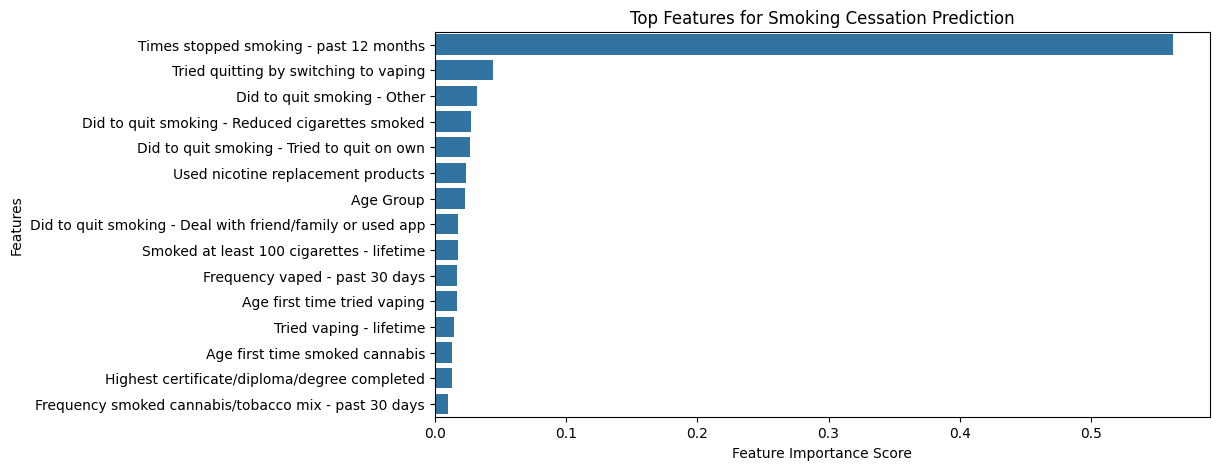

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 15 important features
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features for Smoking Cessation Prediction")
plt.show()


In [272]:
imp_features=feature_importance[0:15].index.to_list()

In [273]:
feature_importance[0:15].index.to_list()

['Times stopped smoking - past 12 months',
 'Tried quitting by switching to vaping',
 'Did to quit smoking - Other',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Did to quit smoking - Tried to quit on own',
 'Used nicotine replacement products',
 'Age Group',
 'Did to quit smoking - Deal with friend/family or used app',
 'Smoked at least 100 cigarettes - lifetime',
 'Frequency vaped - past 30 days',
 'Age first time tried vaping',
 'Tried vaping - lifetime',
 'Age first time smoked cannabis',
 'Highest certificate/diploma/degree completed',
 'Frequency smoked cannabis/tobacco mix - past 30 days']

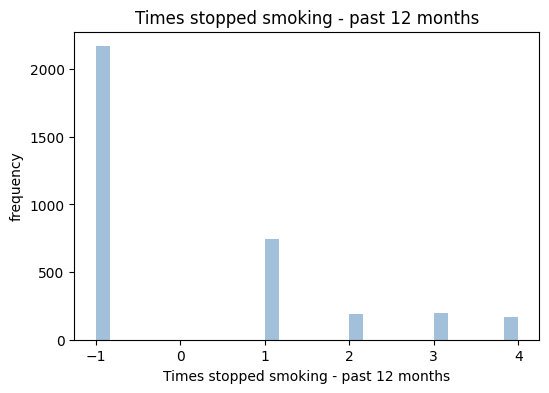

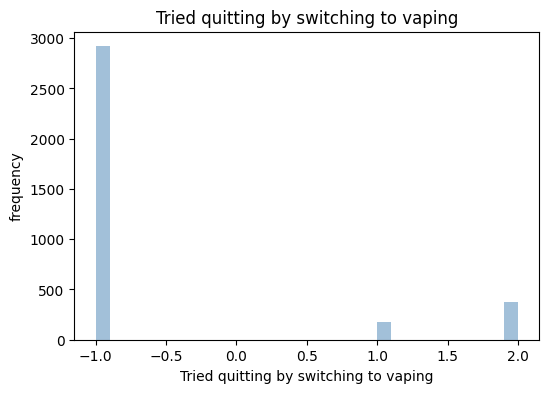

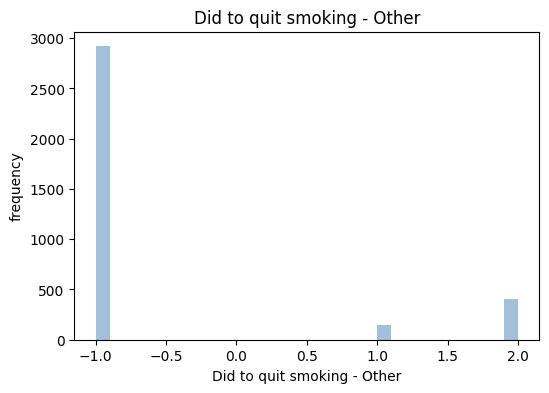

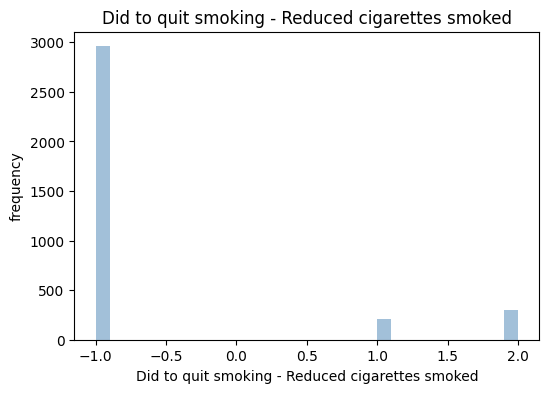

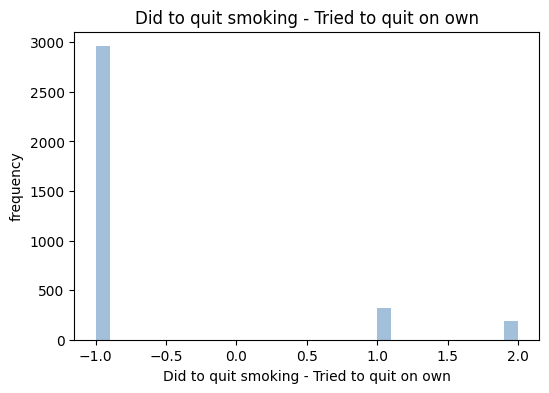

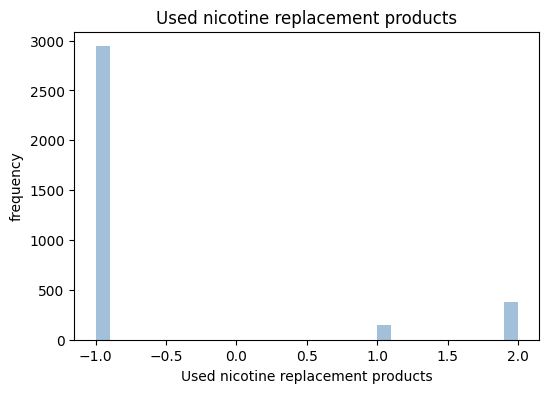

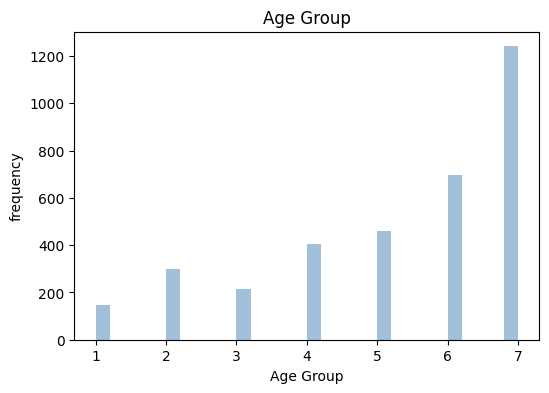

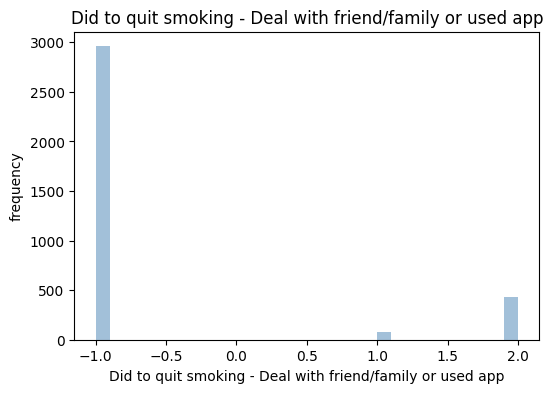

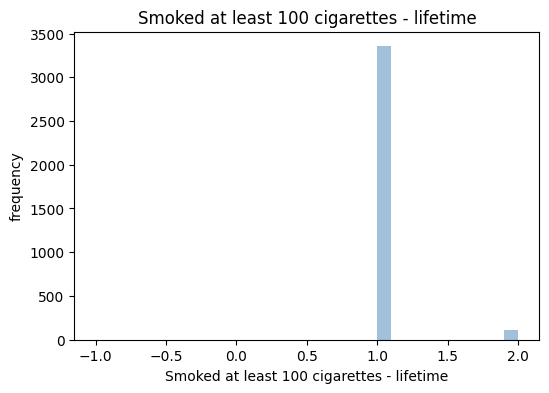

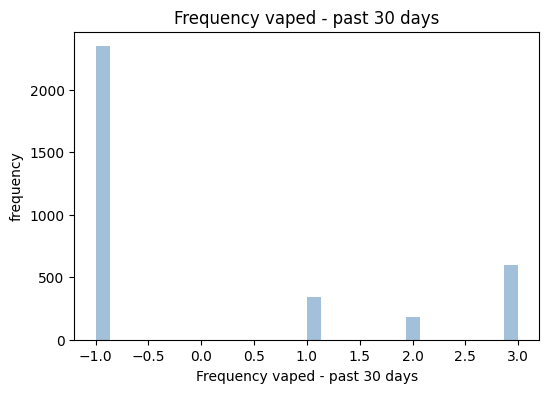

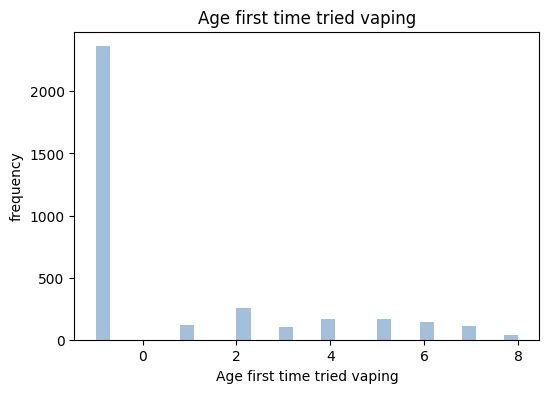

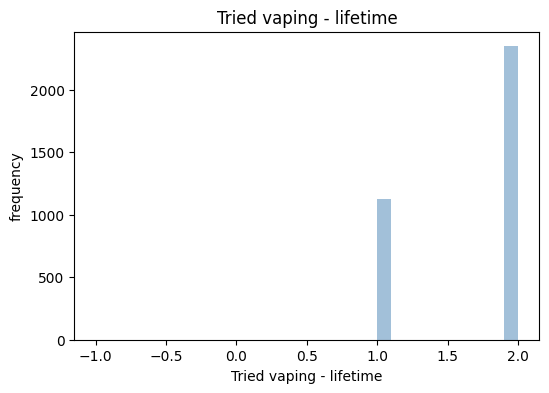

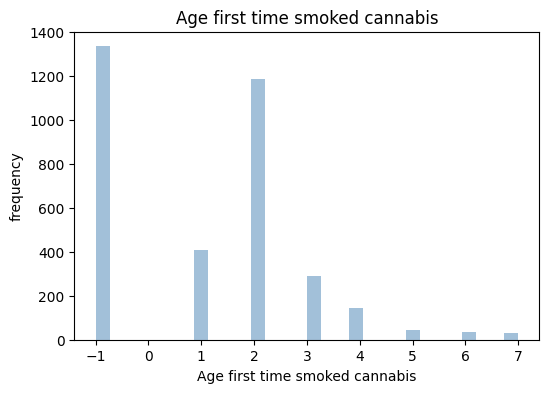

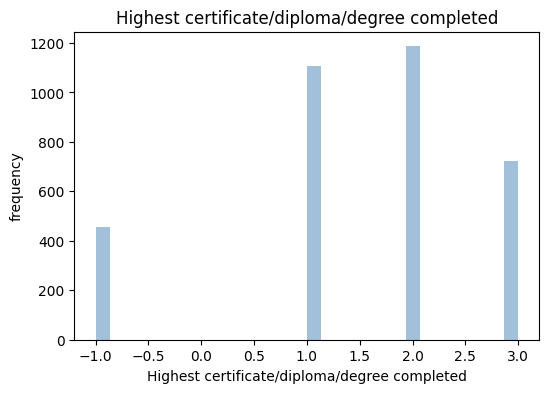

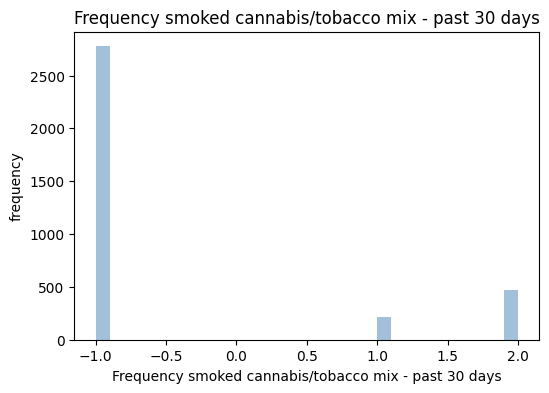

In [274]:
for feature in imp_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("frequency")
plt.show()


In [275]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Select relevant features based on feature importance
selected_features = imp_features

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9582132564841499
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       242
           2       0.97      0.96      0.97       452

    accuracy                           0.96       694
   macro avg       0.95      0.96      0.95       694
weighted avg       0.96      0.96      0.96       694



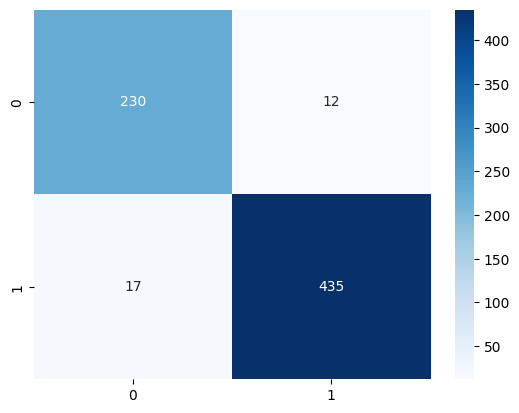

In [277]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [278]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.968299711815562
              precision    recall  f1-score   support

           1       0.93      0.98      0.96       242
           2       0.99      0.96      0.98       452

    accuracy                           0.97       694
   macro avg       0.96      0.97      0.97       694
weighted avg       0.97      0.97      0.97       694



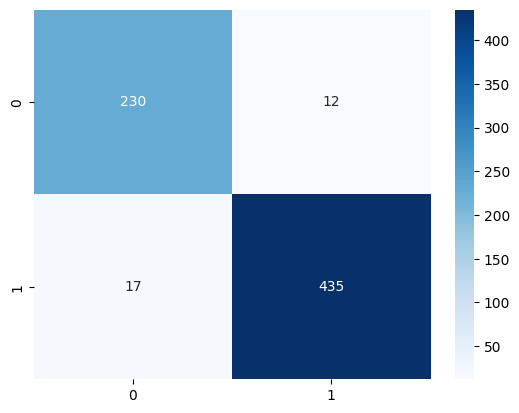

In [279]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [280]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validation scores: {rf_cv_scores}")
print(f"Average CV score: {np.mean(rf_cv_scores)}")


Cross-validation scores: [0.96541787 0.95965418 0.96685879 0.9610951  0.94949495]
Average CV score: 0.9605041772188747


In [281]:
# The two models are performes good with an accuracy of 95 and 98 respectively. And the precision,recall, f1 score and support are balanced.

In [282]:
#Changes---
# did some eda and plotted graphs
# instead of creating a new target field  "Quit smoking" using the "When stopped smoking cigarettes" feature, used "smoking status"
# removed non-smokers from target variable(just leaving current and former smokers)
# Selected new features for modelling, removed features that can highly influence or that can lead to data leakage,  increased generalization
# corrected the valid skip and not stated part
# used carmers coorelation instead of spearman

In [283]:
#Further work
# more eda
#work on feature selection and more models
# check for more features that can create data leakage
# can think about using the merged data of three years and do the training, so the model can train on more data, just use the selected features(so check if the merged data has the relevant features)
# research on more effective ways to handle valid skip 

# Further analysis of data

In [284]:
data["Smoking Status (3 levels)"].value_counts()

Smoking Status (3 levels)
2    2271
1    1198
Name: count, dtype: int64

In [285]:
#Checking the class balance
# Class 1- current smokers (Current Smoker) (Did not quit)
#Class 2 -Former smoker (Did quit)
data["Smoking Status (3 levels)"].value_counts()/len(data["Smoking Status (3 levels)"])*100

Smoking Status (3 levels)
2    65.465552
1    34.534448
Name: count, dtype: float64

In [286]:
# The data is imbalanced the model is biased towards the majority class

In [287]:
# Check for multi collinearity- An extreme case of correlated variables produces multicollinearity — a condition in which there is redundance among the predictor variables
# Multicollinearity is not such a problem for nonregression methods like trees, clustering, and nearest-neighbors, and in such methods it may be advisable to retain P dummies (instead of P –1). That said, even in those methods, nonredundancy in predictor variables is still a virtue.

In [288]:
# checking deeper about the variable "Times stopped vaping - past 12 months" which is highly coorelated with target. # The document does not provide any information that it can cause data leakage

In [289]:
# Future work thought about using survey weight to represent the model----decisison---As we are  predicting an individual’s likelihood of quitting smoking, survey weights are not useful because they reflect population adjustment, not personal behavior.

In [290]:
# Checking if the most inflentiantial feature is causing any data leakage as even the baseline model is performing too good to be true
# most influential feature
# Times stopped smoking - past 12 months

In [291]:
data.groupby("Times stopped smoking - past 12 months")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Times stopped smoking - past 12 months,,
-1,9,2160
1,732,16
2,143,45
3,164,30
4,150,20


In [292]:
data[data["Times stopped smoking - past 12 months"] == -1]["Frequency smoked cigarettes - past 30 days"].value_counts()

Frequency smoked cigarettes - past 30 days
4    2160
1       5
2       4
Name: count, dtype: int64

In [293]:
data[data["Frequency smoked cigarettes - past 30 days"] == 4]["Smoking Status (3 levels)"].value_counts()

Smoking Status (3 levels)
2    2271
Name: count, dtype: int64

In [294]:
# issue -1 means valid skip or not stated and is not a real category but we can see that about 2160 values has -1 as "times stopped smoking" and 2 as smoking status. This makes it too easier for the model to train. I already removed the non smokers  from the data, need to check why this valid skip came.

In [295]:
#data[data[data["Times stopped smoking - past 12 months"]==6].duplicated()==False]
a= data[data["Times stopped smoking - past 12 months"]==-1].drop_duplicates()
a
for column in a.columns:
    print(f"{column}:{a[column].unique()}")

Random ID:[65203 65205 65208 ... 77310 77312 77313]
Smoked a cigarette - lifetime:[1]
Age first time smoked whole cigarette:[ 2  1  6  3  5 -1  4]
Frequency smoked cigarettes - past 30 days:[4 1 2]
Days smoked per week - past 30 days:[6 9 1]
Smoked at least 100 cigarettes - lifetime:[1 2]
When stopped smoking cigarettes:[ 3  2 -1  1]
Month stopped smoking:[-1  4  1]
Number of cigarettes smoked - Day 1:[-1  1  0]
Number of cigarettes smoked - Day 2:[-1  1  0]
Number of cigarettes smoked - Day 3:[-1  1  0]
Number of cigarettes smoked - Day 4:[-1  1  0]
Number of cigarettes smoked - Day 5:[-1  1  0]
Number of cigarettes smoked - Day 6:[-1  1  0]
Number of cigarettes smoked - Day 7:[-1  1  0]
Times stopped smoking - past 12 months:[-1]
Tried quitting by switching to vaping:[-1]
Used vaping device with nicotine:[-1]
Used vaping device without nicotine/unknown:[-1]
Did to quit smoking - Deal with friend/family or used app:[-1]
Did to quit smoking - Reduced cigarettes smoked:[-1]
Did to quit 

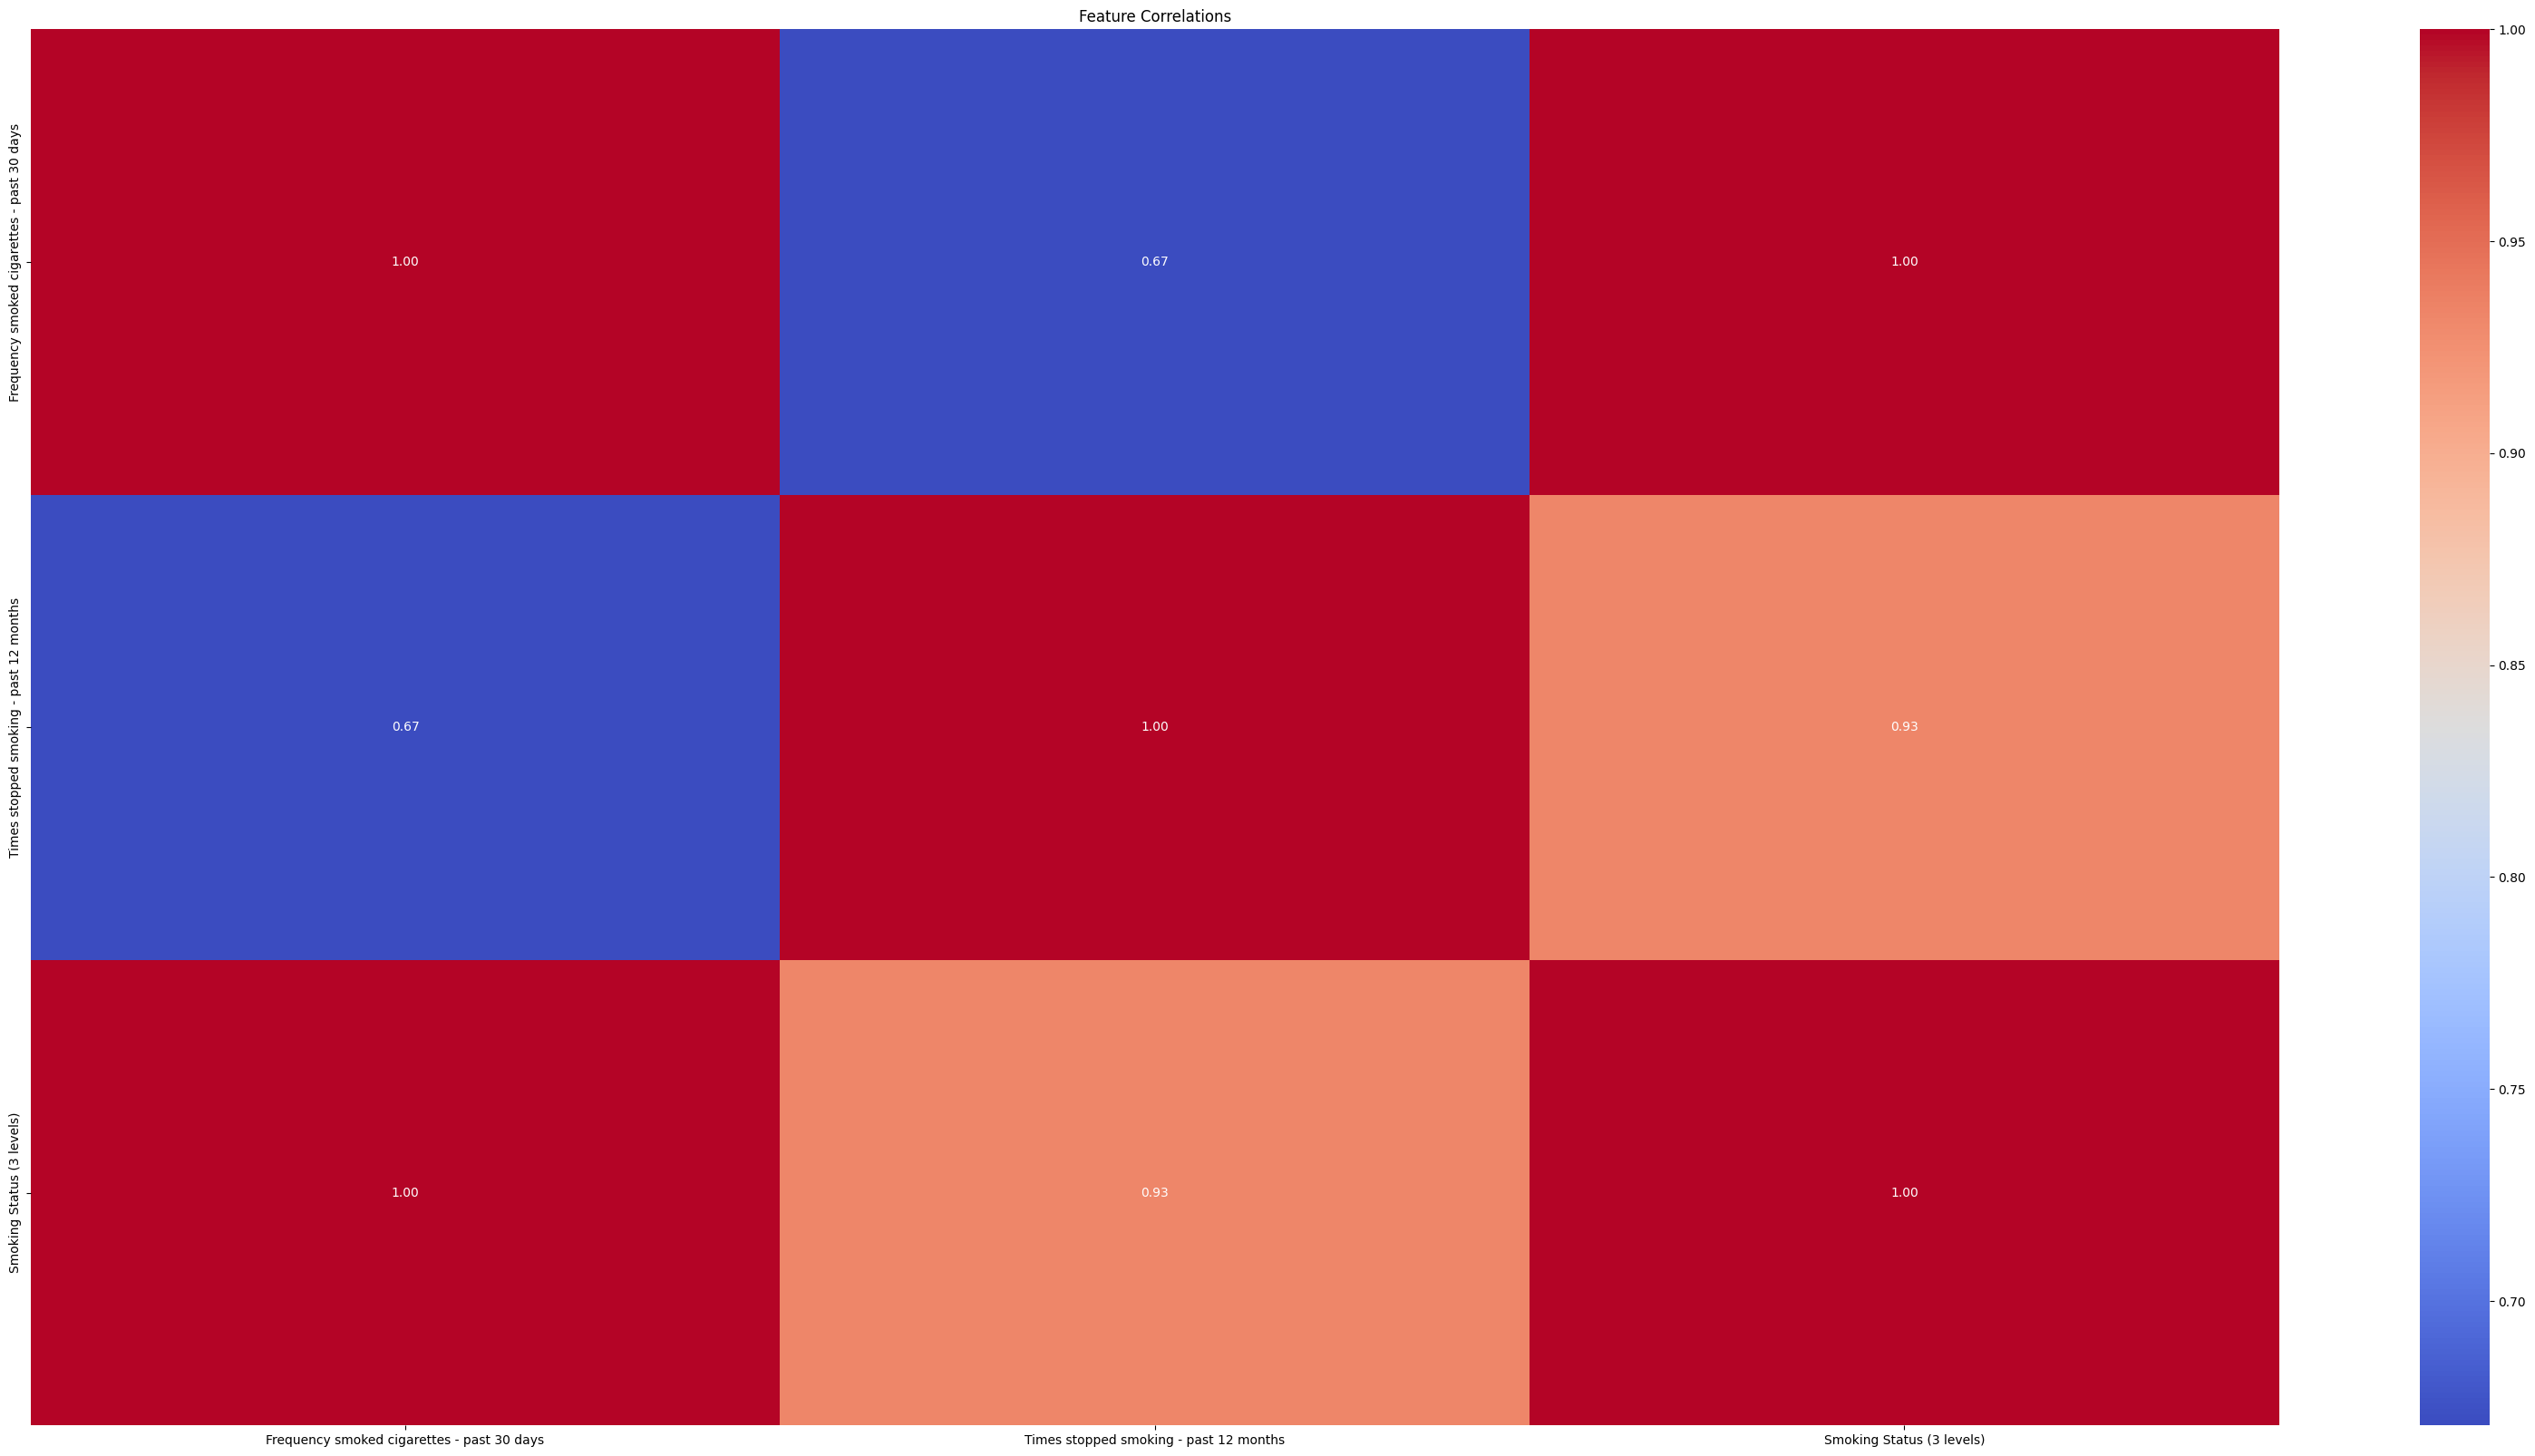

In [297]:
# Convert categorical columns to numeric if necessary
data_numeric = data[["Frequency smoked cigarettes - past 30 days","Times stopped smoking - past 12 months","Smoking Status (3 levels)"]].select_dtypes(include=["number"])

cols = data_numeric.columns

cv_arr = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cv_arr[i,j] = cramers_v(data_numeric[cols[i]], data_numeric[cols[j]])

plt.figure(figsize=(40, 20))
sns.heatmap(pd.DataFrame(cv_arr, columns = cols, index = cols), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [298]:
# Filter out rows where "Times Stopped Smoking" = -1
data_filtered = data[data["Times stopped smoking - past 12 months"] != -1]
print(f"data length after filtering: {len(data_filtered)}")

# Redefine X and y for training and testing
X_filtered = data_filtered[selected_features]
y_filtered = data_filtered["Smoking Status (3 levels)"]

# Train-test split with the filtered data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Re-train the model
rf.fit(X_train, y_train)

# Evaluate the model again
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after removing 'Times Stopped Smoking = -1': {accuracy}")
print(classification_report(y_test, y_pred))



data length after filtering: 1300
Accuracy after removing 'Times Stopped Smoking = -1': 0.9
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       237
           2       0.00      0.00      0.00        23

    accuracy                           0.90       260
   macro avg       0.46      0.49      0.47       260
weighted avg       0.83      0.90      0.86       260



In [299]:
# remove times stopped smoking
Removing_features=["Frequency smoked cigarettes - past 30 days","Smoking Status (4 levels)","Number of cigarettes smoked - Day 1","Number of cigarettes smoked - Day 3","Number of cigarettes smoked - Day 5","Number of cigarettes smoked - Day 6","Number of cigarettes smoked - Day 4","Number of cigarettes smoked - Day 2","Number of cigarettes smoked - Day 7","When stopped smoking cigarettes","Month stopped smoking","Avg cigarettes smoked per day (weekly basis)","Days smoked per week - past 30 days","Times stopped smoking - past 12 months"]

In [300]:
selected_features = [feature for feature in selected_features if feature not in Removing_features]

Age first time smoked cannabis                               0.122957
Age Group                                                    0.116937
Age first time tried vaping                                  0.096857
Tried quitting by switching to vaping                        0.095033
Did to quit smoking - Other                                  0.084798
Frequency smoked cannabis/tobacco mix - past 30 days         0.079566
Highest certificate/diploma/degree completed                 0.068905
Frequency vaped - past 30 days                               0.065087
Smoked at least 100 cigarettes - lifetime                    0.061254
Used nicotine replacement products                           0.054689
Did to quit smoking - Tried to quit on own                   0.042725
Did to quit smoking - Reduced cigarettes smoked              0.040558
Tried vaping - lifetime                                      0.039376
Did to quit smoking - Deal with friend/family or used app    0.031257
dtype: float64


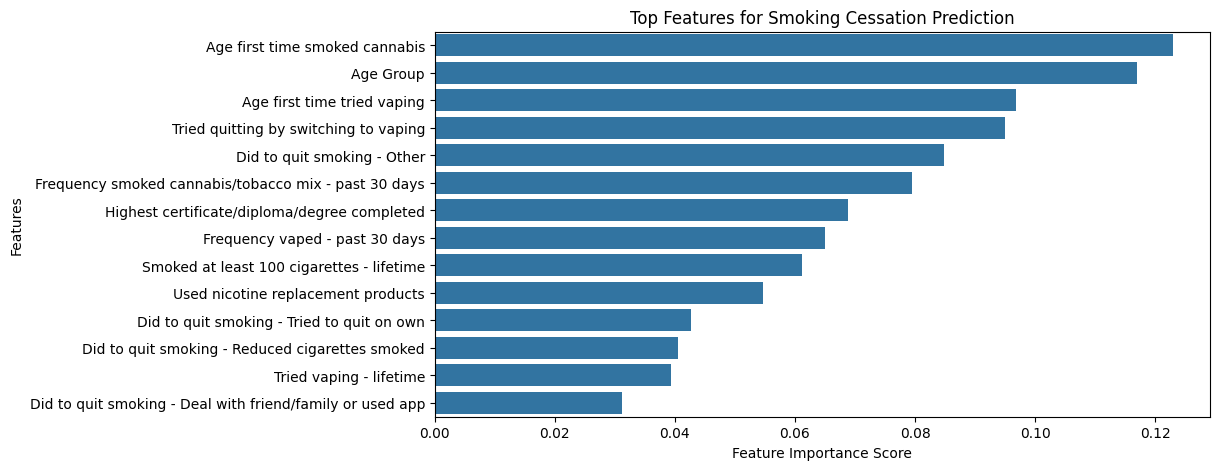

In [301]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 15 important features
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features for Smoking Cessation Prediction")
plt.show()


In [302]:
imp_features=feature_importance[0:15].index.to_list()

In [303]:
feature_importance[0:15].index.to_list()

['Age first time smoked cannabis',
 'Age Group',
 'Age first time tried vaping',
 'Tried quitting by switching to vaping',
 'Did to quit smoking - Other',
 'Frequency smoked cannabis/tobacco mix - past 30 days',
 'Highest certificate/diploma/degree completed',
 'Frequency vaped - past 30 days',
 'Smoked at least 100 cigarettes - lifetime',
 'Used nicotine replacement products',
 'Did to quit smoking - Tried to quit on own',
 'Did to quit smoking - Reduced cigarettes smoked',
 'Tried vaping - lifetime',
 'Did to quit smoking - Deal with friend/family or used app']

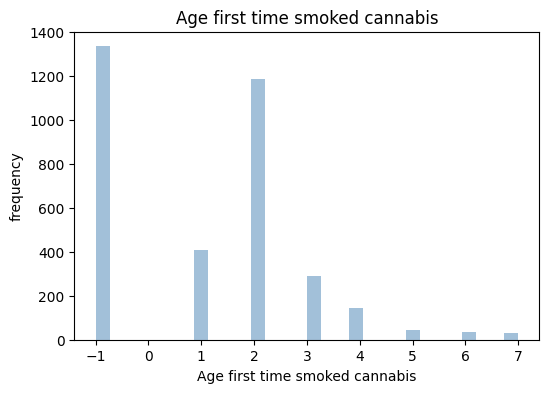

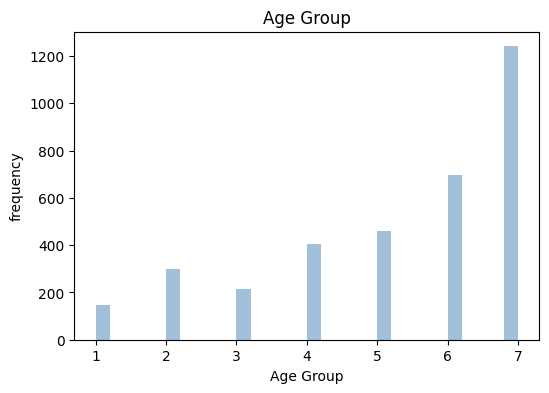

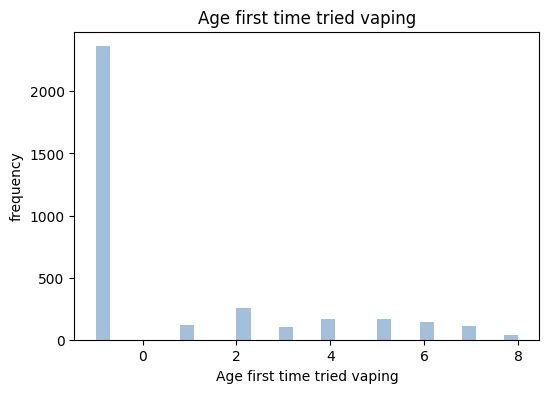

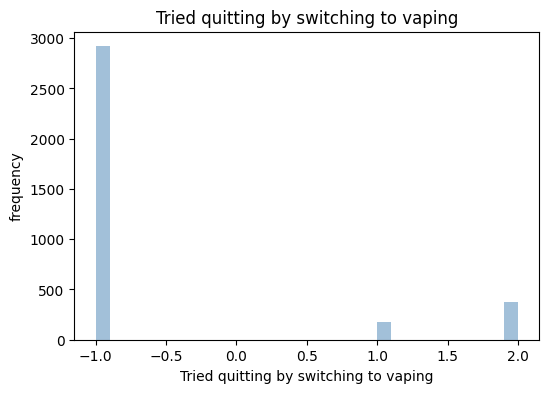

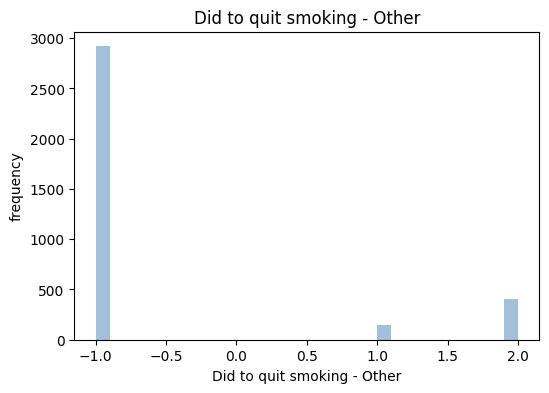

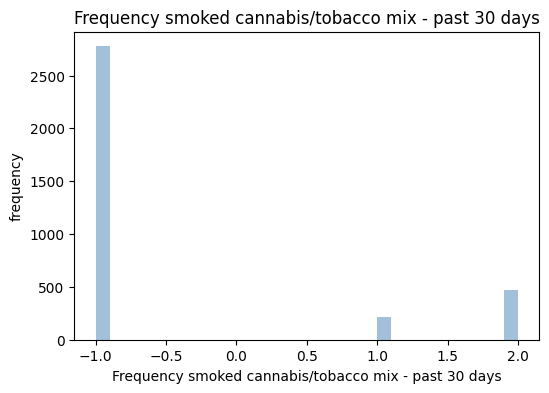

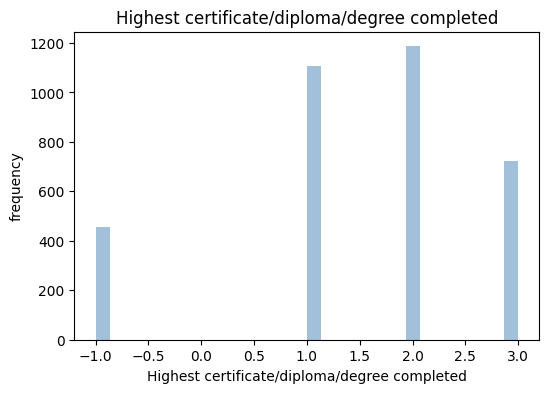

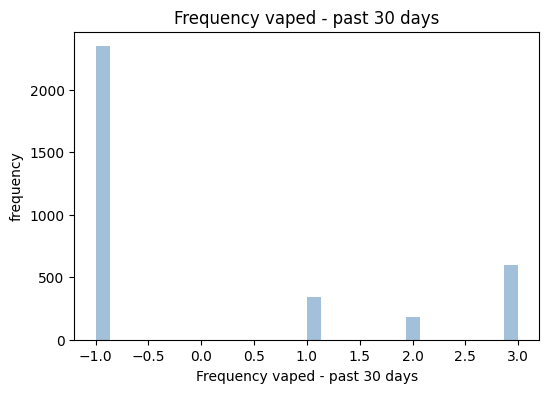

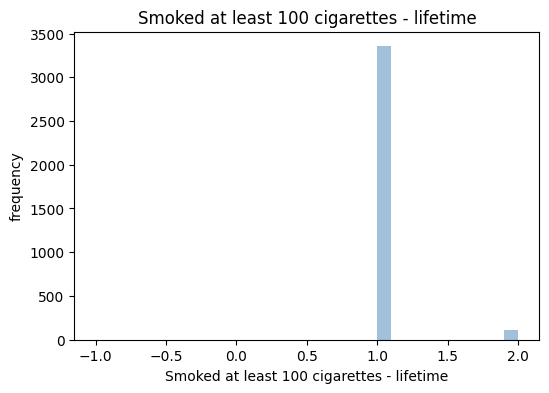

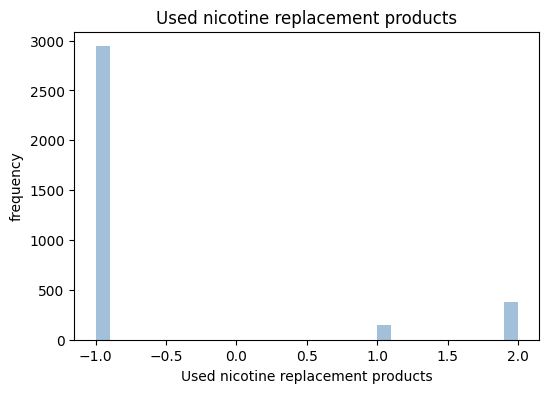

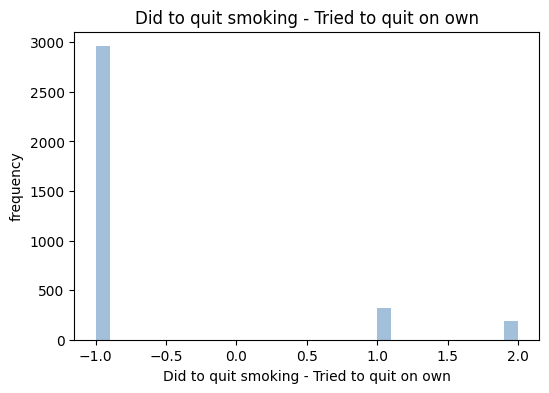

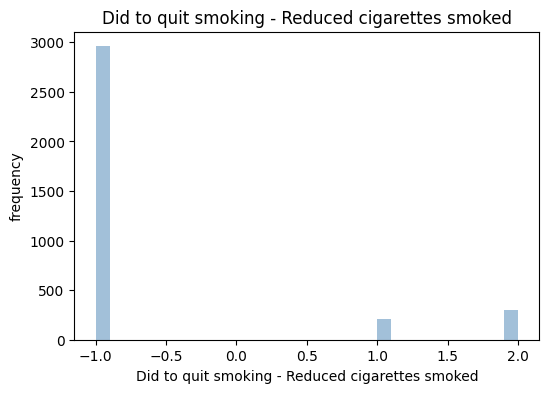

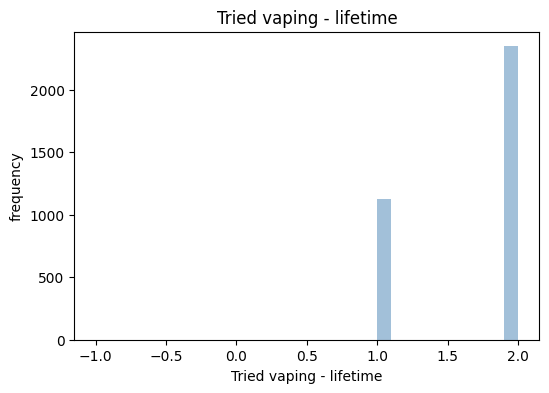

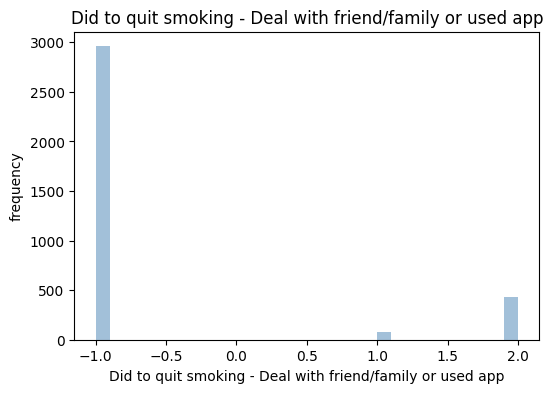

In [304]:
for feature in imp_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("frequency")
plt.show()

In [305]:
# Select relevant features based on feature importance
selected_features = imp_features

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]


# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [306]:
# Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.760806916426513
              precision    recall  f1-score   support

           1       0.81      0.41      0.54       242
           2       0.75      0.95      0.84       452

    accuracy                           0.76       694
   macro avg       0.78      0.68      0.69       694
weighted avg       0.77      0.76      0.74       694



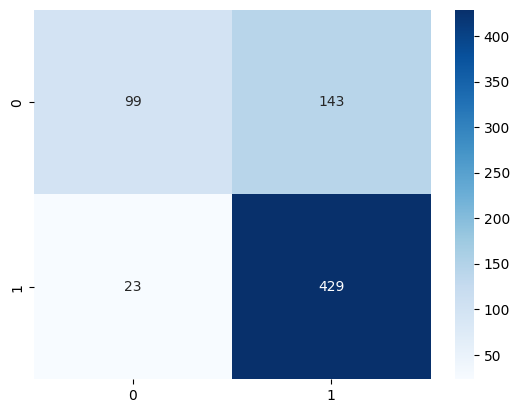

In [307]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [308]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7579250720461095
              precision    recall  f1-score   support

           1       0.72      0.50      0.59       242
           2       0.77      0.89      0.83       452

    accuracy                           0.76       694
   macro avg       0.74      0.70      0.71       694
weighted avg       0.75      0.76      0.75       694



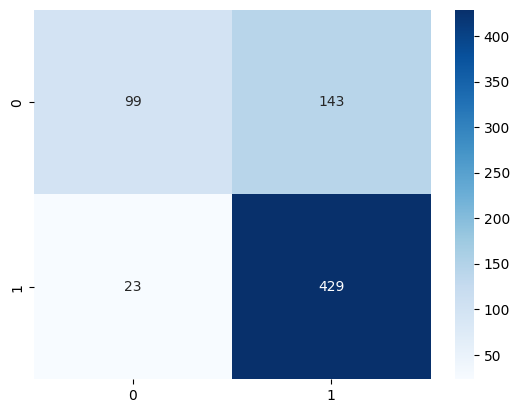

In [309]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [310]:
# As we can is the variable "Frequency smoked cigarettes - past 30 days"] == 4] is completely coorelated to target, and the variable "Times stopped smoking" is related to the "frequeny smoked-past 30", which in turn means that it is coorelated to target. we removed the frequency variable but the "times stopped smoking" still effected it.

In [311]:
# Now the baseline model performs in a normal way that we expect.

In [312]:
#dealt with data leakage.

In [313]:
# Further works-
# Deal with the class imbalance
# Try new models-svm(can deal with missing values)
#The baseline model seems to be considering the valid skip as a seperate category, think if there is any option other than encoding it as -1.
# maybe need to standardise all variables
# Try tuning the models

In [314]:
# Dealing with class imbalance -using smote

In [315]:
from imblearn.over_sampling import SMOTE

In [316]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [317]:
# Standardize numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [318]:
# Train model
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7492795389048992
              precision    recall  f1-score   support

           1       0.64      0.63      0.64       242
           2       0.80      0.81      0.81       452

    accuracy                           0.75       694
   macro avg       0.72      0.72      0.72       694
weighted avg       0.75      0.75      0.75       694



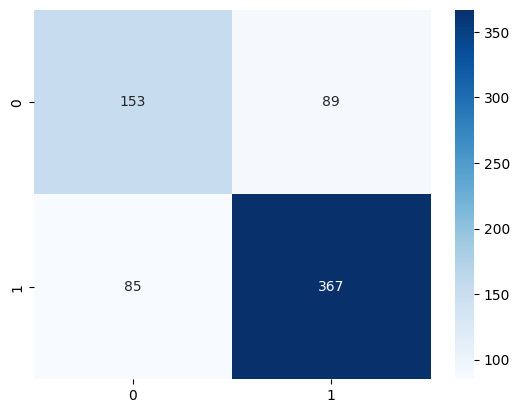

In [319]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [320]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7550432276657061
              precision    recall  f1-score   support

           1       0.71      0.50      0.59       242
           2       0.77      0.89      0.83       452

    accuracy                           0.76       694
   macro avg       0.74      0.70      0.71       694
weighted avg       0.75      0.76      0.74       694



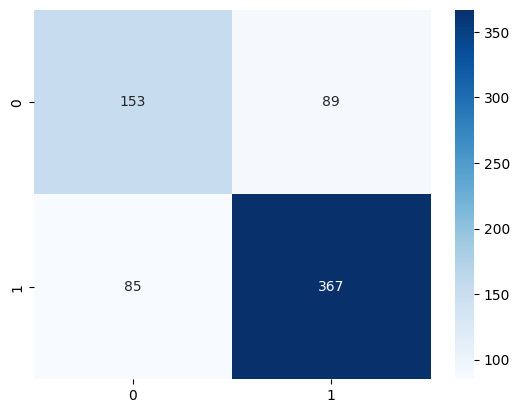

In [321]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [322]:
# Smoking cessation prediction can help in effective treatment programs and intervention for smoking cessation.

In [323]:
# consider demographic 
# motivation
# intervention stratergies

In [324]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

In [325]:
# keeping only observable variables

In [326]:
selected_features=["Age first time smoked whole cigarette","Tried quitting by switching to vaping","Used vaping device with nicotine","Used vaping device without nicotine/unknown","Did to quit smoking - Deal with friend/family or used app","Did to quit smoking - Reduced cigarettes smoked","Did to quit smoking - Tried to quit on own","Did to quit smoking - Other","Used nicotine replacement products","Perception of harm - Vaping vs cigarettes","Tried vaping - lifetime","Smoked cannabis - lifetime","Age first time smoked cannabis","Vaped cannabis - lifetime","Age first time vaped cannabis","Tried first substance","Age Group","Province of Residence","Highest certificate/diploma/degree completed","Indigenous identity flag","Visible minority flag","Sexual identity flag","Person with disability (self-declared)","Perceived health","Perceived mental health"]

Province of Residence                                        0.117676
Perception of harm - Vaping vs cigarettes                    0.089288
Age Group                                                    0.085342
Perceived mental health                                      0.074751
Perceived health                                             0.070147
Age first time smoked whole cigarette                        0.062088
Did to quit smoking - Other                                  0.056620
Highest certificate/diploma/degree completed                 0.049186
Age first time smoked cannabis                               0.049070
Tried vaping - lifetime                                      0.041112
Tried quitting by switching to vaping                        0.039414
Used nicotine replacement products                           0.037548
Did to quit smoking - Deal with friend/family or used app    0.031724
Tried first substance                                        0.027061
Age first time vaped

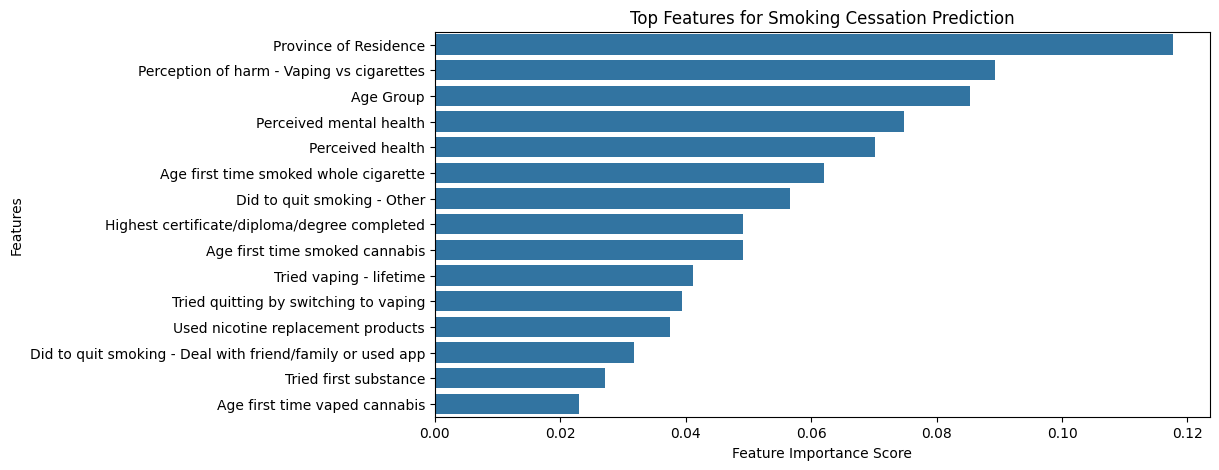

In [327]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data[selected_features]
y = data["Smoking Status (3 levels)"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 15 important features
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top Features for Smoking Cessation Prediction")
plt.show()


In [328]:
imp_features=feature_importance[0:15].index.to_list()

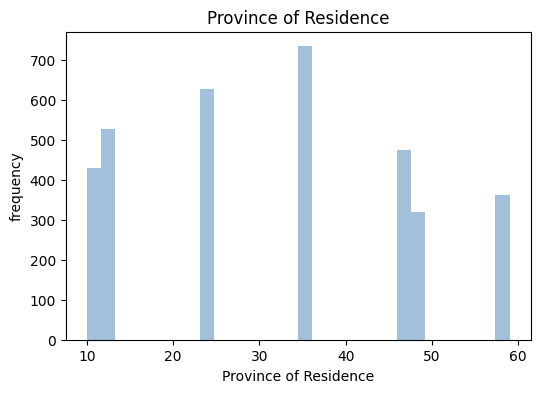

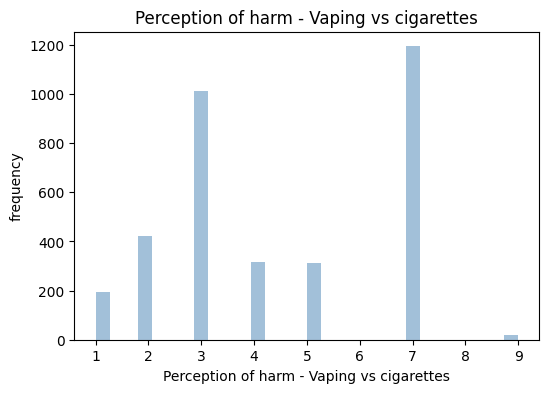

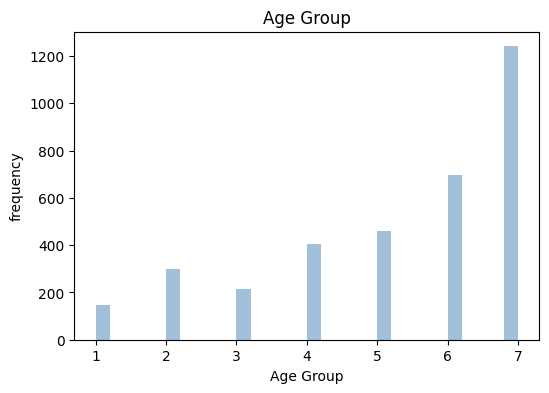

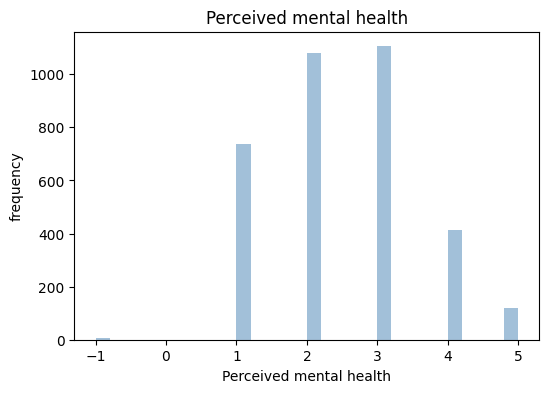

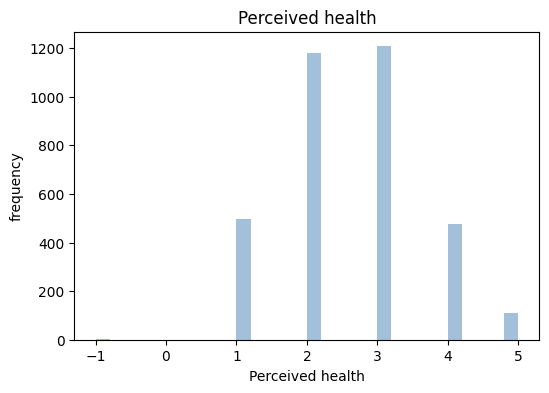

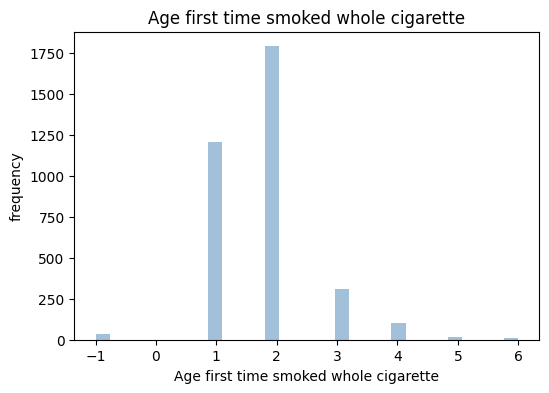

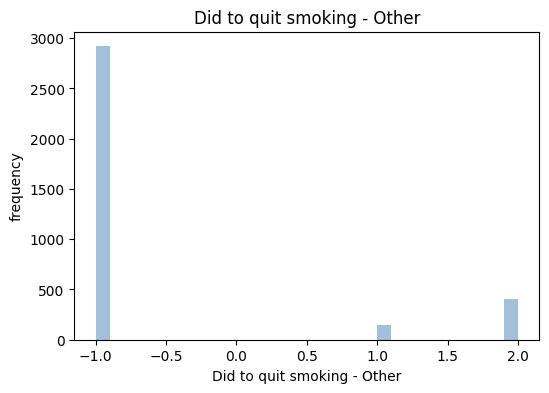

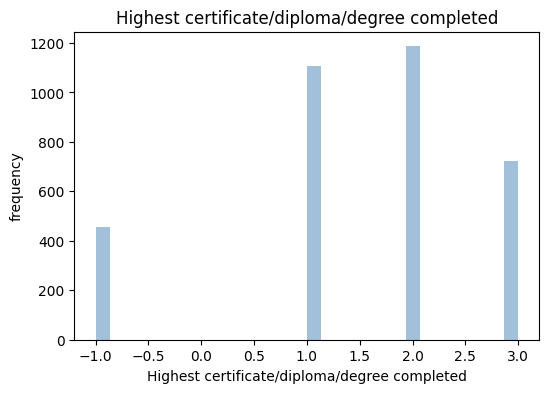

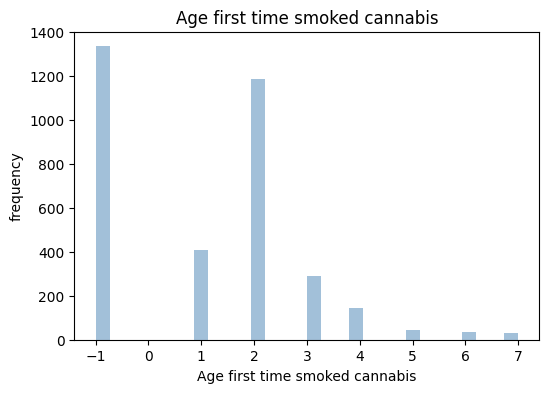

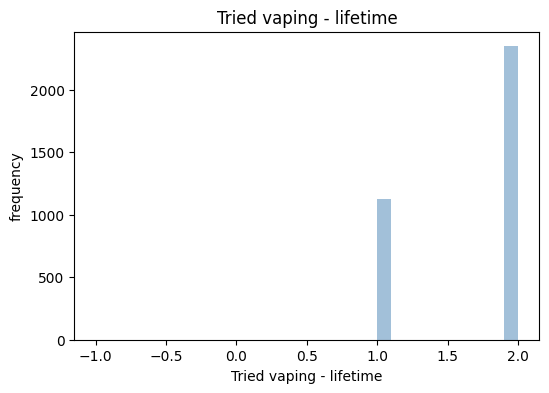

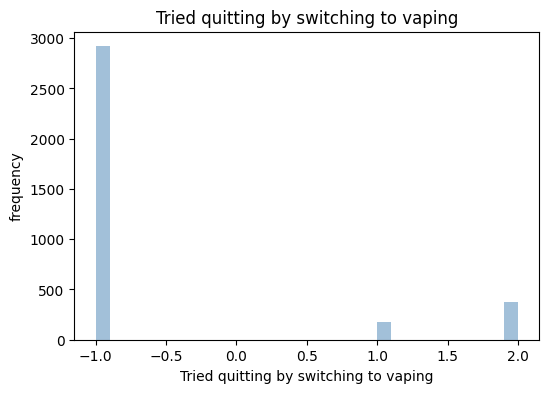

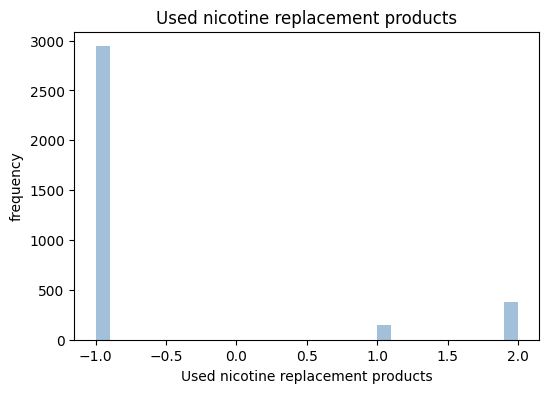

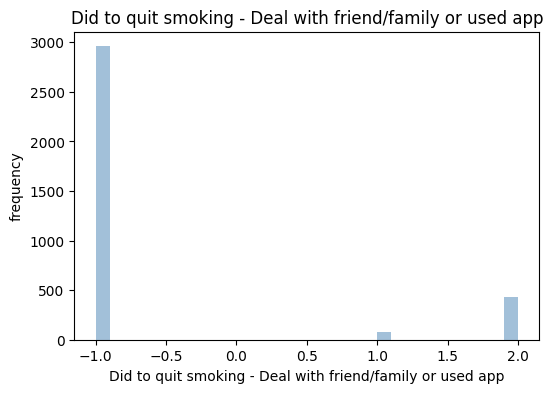

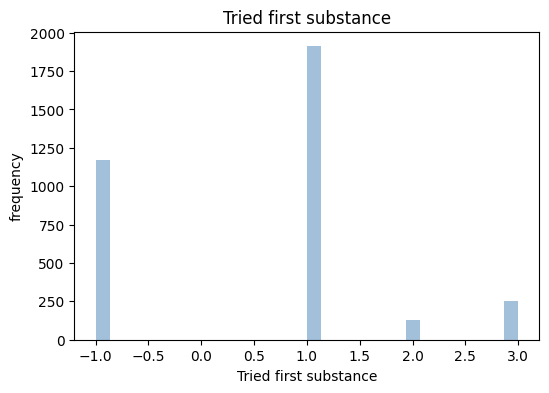

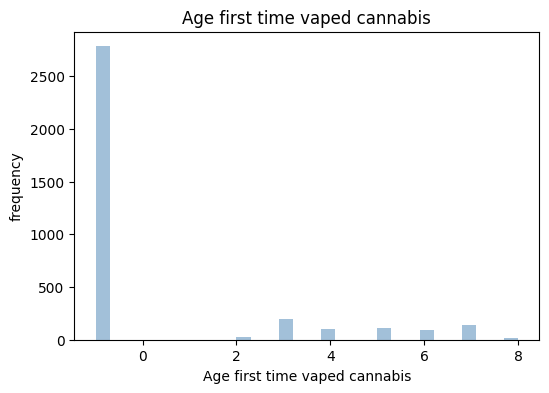

In [329]:
for feature in imp_features:
    plt.figure(figsize=(6, 4))
    plt.hist(data[feature], bins=30,alpha=0.5,
histtype='stepfilled', color='steelblue',
edgecolor='none');
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("frequency")
plt.show()

In [330]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [331]:
# Standardize numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [332]:
# Train model
logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7262247838616714
              precision    recall  f1-score   support

           1       0.61      0.59      0.60       242
           2       0.78      0.80      0.79       452

    accuracy                           0.73       694
   macro avg       0.70      0.69      0.70       694
weighted avg       0.72      0.73      0.73       694



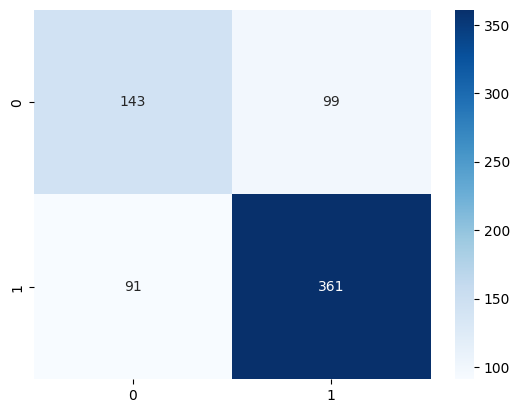

In [333]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [334]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7319884726224783
              precision    recall  f1-score   support

           1       0.62      0.60      0.61       242
           2       0.79      0.80      0.80       452

    accuracy                           0.73       694
   macro avg       0.70      0.70      0.70       694
weighted avg       0.73      0.73      0.73       694



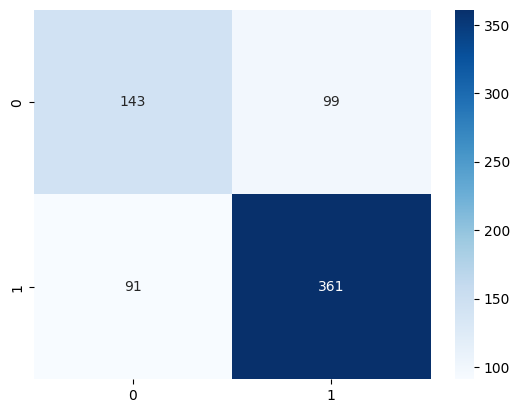

In [335]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [336]:
# most influential- # province of residence

In [337]:
data.groupby("Province of Residence")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Province of Residence,,
10,57,150
11,64,158
12,90,179
13,89,169
24,213,413
35,250,483
46,100,147
47,90,137
48,131,187


In [338]:
data.groupby("Perception of harm - Vaping vs cigarettes")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Perception of harm - Vaping vs cigarettes,,
1,92,104
2,186,236
3,320,691
4,117,198
5,108,204
7,370,824
9,5,14


In [339]:
data.groupby("Age Group")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Age Group,,
1,117,32
2,179,119
3,97,117
4,153,253
5,141,321
6,231,468
7,280,961


In [340]:
data.groupby("Perceived health")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Perceived health,,
-1,2,1
1,167,328
2,364,815
3,446,761
4,183,294
5,36,72


In [341]:
data.groupby("Perceived mental health")["Smoking Status (3 levels)"].value_counts().unstack()

Smoking Status (3 levels),1,2
Perceived mental health,,
-1,5,3
1,234,505
2,331,750
3,386,719
4,177,238
5,65,56


In [342]:
data.columns

Index(['Random ID', 'Smoked a cigarette - lifetime',
       'Age first time smoked whole cigarette',
       'Frequency smoked cigarettes - past 30 days',
       'Days smoked per week - past 30 days',
       'Smoked at least 100 cigarettes - lifetime',
       'When stopped smoking cigarettes', 'Month stopped smoking',
       'Number of cigarettes smoked - Day 1',
       'Number of cigarettes smoked - Day 2',
       'Number of cigarettes smoked - Day 3',
       'Number of cigarettes smoked - Day 4',
       'Number of cigarettes smoked - Day 5',
       'Number of cigarettes smoked - Day 6',
       'Number of cigarettes smoked - Day 7',
       'Times stopped smoking - past 12 months',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to 

In [343]:
# what have done
#The initial accuracy score of the baseline model without tuning  was 96%, it's too good to be true, decided to check on feature that can cause data leakage
# The data has class imbalance--decides to use SMOTE (Synthetic Minority Oversampling Technique)
# The feature "Times stopped smoking" was suspected to be  the feature causing data leakage, decided to remove it and see if the accuracy score changes , the precision , recall and f1 score for the class "2" became 0. That means the model was highly dependent on this feature to predict class "2". Also the class imbalance play a part.
# after removing times stopped accuracy dropped to 76%, not  treated class imbalance yet
#class 1.f1==54%
#class 2.f2==84%
#after smote-->accuracy 74% f1 score for class "1"==64% class"2"==81%


In [344]:
# FUTURE WORK
# Try different models
# Feature enginnering and selection 
# Tuning
# keep only the observable features and available features at the time of prediction

In [345]:
# After keeping observable features only - the accuracy now is 73% and f1 scores are 61 and 73

In [346]:
# completed the final baseline model

In [347]:
# possible classification models - logistic regression, decision tree, random forest, support vector machine, naive bayes, k-nearest neighbors, neural networks, Ridge Classifier, stochastic gradient descent

In [348]:
selected_features.append("Smoking Status (3 levels)")

In [349]:
print(selected_features)

['Age first time smoked whole cigarette', 'Tried quitting by switching to vaping', 'Used vaping device with nicotine', 'Used vaping device without nicotine/unknown', 'Did to quit smoking - Deal with friend/family or used app', 'Did to quit smoking - Reduced cigarettes smoked', 'Did to quit smoking - Tried to quit on own', 'Did to quit smoking - Other', 'Used nicotine replacement products', 'Perception of harm - Vaping vs cigarettes', 'Tried vaping - lifetime', 'Smoked cannabis - lifetime', 'Age first time smoked cannabis', 'Vaped cannabis - lifetime', 'Age first time vaped cannabis', 'Tried first substance', 'Age Group', 'Province of Residence', 'Highest certificate/diploma/degree completed', 'Indigenous identity flag', 'Visible minority flag', 'Sexual identity flag', 'Person with disability (self-declared)', 'Perceived health', 'Perceived mental health', 'Smoking Status (3 levels)']


In [350]:
data_final=data[selected_features]

In [351]:
data_final.columns

Index(['Age first time smoked whole cigarette',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to quit on own',
       'Did to quit smoking - Other', 'Used nicotine replacement products',
       'Perception of harm - Vaping vs cigarettes', 'Tried vaping - lifetime',
       'Smoked cannabis - lifetime', 'Age first time smoked cannabis',
       'Vaped cannabis - lifetime', 'Age first time vaped cannabis',
       'Tried first substance', 'Age Group', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)',
       'Perceived health', 'Perceived mental health',
       'Smoking Statu

In [352]:
# Going to remove redundant variables such as 'Did to quit smoking - Other'

In [353]:
data_final.drop(["Did to quit smoking - Other"],axis=1)

,Age first time smoked whole cigarette,Tried quitting by switching to vaping,Used vaping device with nicotine,Used vaping device without nicotine/unknown,Did to quit smoking - Deal with friend/family or used app,Did to quit smoking - Reduced cigarettes smoked,Did to quit smoking - Tried to quit on own,Used nicotine replacement products,Perception of harm - Vaping vs cigarettes,Tried vaping - lifetime,...,Age Group,Province of Residence,Highest certificate/diploma/degree completed,Indigenous identity flag,Visible minority flag,Sexual identity flag,Person with disability (self-declared),Perceived health,Perceived mental health,Smoking Status (3 levels)
16,3,-1,-1,-1,-1,-1,-1,-1,2,2,...,7,35,3,2,2,2,2,2,2,1
17,1,-1,-1,-1,-1,-1,-1,-1,3,1,...,7,35,2,2,-1,-1,2,2,2,1
20,2,-1,-1,-1,-1,-1,-1,-1,3,2,...,6,13,2,2,2,2,1,4,3,2
22,2,-1,-1,-1,-1,-1,-1,-1,3,2,...,7,48,3,2,2,2,2,2,2,2
23,2,-1,-1,-1,-1,-1,-1,-1,5,2,...,7,47,1,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12122,3,-1,-1,-1,-1,-1,-1,-1,7,2,...,7,48,1,2,2,2,2,3,3,2
12127,2,-1,-1,-1,-1,-1,-1,-1,7,2,...,7,24,2,2,2,2,2,3,2,2
12129,2,-1,-1,-1,-1,-1,-1,-1,7,2,...,7,46,2,2,2,2,1,4,3,2
12130,2,-1,-1,-1,-1,-1,-1,-1,1,1,...,4,13,2,2,2,2,2,1,1,2


In [354]:
data_final.columns

Index(['Age first time smoked whole cigarette',
       'Tried quitting by switching to vaping',
       'Used vaping device with nicotine',
       'Used vaping device without nicotine/unknown',
       'Did to quit smoking - Deal with friend/family or used app',
       'Did to quit smoking - Reduced cigarettes smoked',
       'Did to quit smoking - Tried to quit on own',
       'Did to quit smoking - Other', 'Used nicotine replacement products',
       'Perception of harm - Vaping vs cigarettes', 'Tried vaping - lifetime',
       'Smoked cannabis - lifetime', 'Age first time smoked cannabis',
       'Vaped cannabis - lifetime', 'Age first time vaped cannabis',
       'Tried first substance', 'Age Group', 'Province of Residence',
       'Highest certificate/diploma/degree completed',
       'Indigenous identity flag', 'Visible minority flag',
       'Sexual identity flag', 'Person with disability (self-declared)',
       'Perceived health', 'Perceived mental health',
       'Smoking Statu

In [355]:
len(data_final.columns)

26

In [356]:
len(data_final)

3469

In [357]:
# Support Vector Machine
#it is neccessary to scale the data before training the model


In [358]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [359]:
# Define X (features) and y (target)
X = data_final[imp_features]
y = data_final["Smoking Status (3 levels)"]

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [360]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [361]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [362]:
# Predictions
y_pred_rf = clf.predict(X_test)

print("SVC accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

SVC accuracy: 0.7276657060518732
              precision    recall  f1-score   support

           1       0.61      0.61      0.61       242
           2       0.79      0.79      0.79       452

    accuracy                           0.73       694
   macro avg       0.70      0.70      0.70       694
weighted avg       0.73      0.73      0.73       694



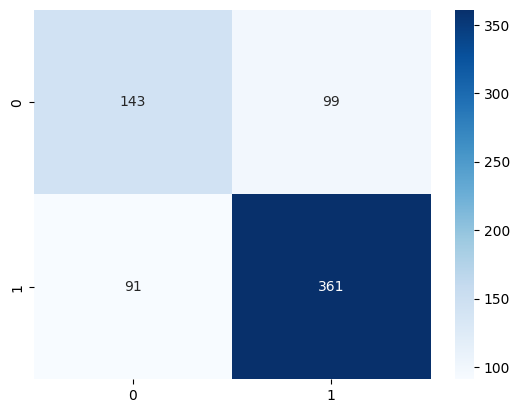

In [363]:
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".3g", cmap = "Blues")

In [364]:
# Try Grid Search for hyperparameter tuning

In [365]:
# we finalized the final features after feature engineering-removed all the feature causing data leakage
# deciding on trying some classification models-logistic regression, decision tree, random forest, support vector machine, naive bayes, k-nearest neighbors, neural networks, Ridge Classifier, stochastic gradient descent
# hypertune the parameters using Grid Search CV

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd

In [367]:
# Define X (features) and y (target)
X = data_final[imp_features]
y = data_final["Smoking Status (3 levels)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KNN accuracy: 0.6844380403458213
              precision    recall  f1-score   support

           1       0.54      0.63      0.58       242
           2       0.78      0.71      0.75       452

    accuracy                           0.68       694
   macro avg       0.66      0.67      0.66       694
weighted avg       0.70      0.68      0.69       694



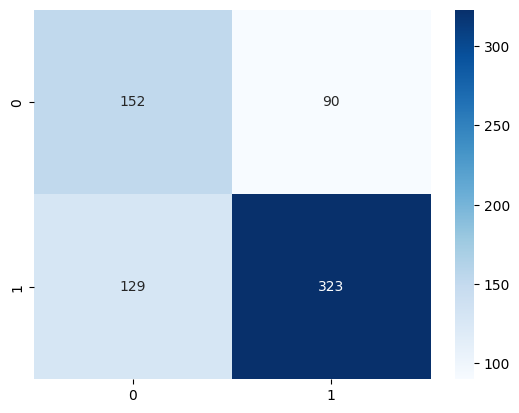

In [368]:
# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define KNN model within a pipeline
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))  # Adjust 'n_neighbors' as needed

# Train the model
clf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_knn = clf.predict(X_test)

# Model evaluation
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion matrix heatmap
_ = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt=".3g", cmap="Blues")

In [369]:
#SVM has the highest accuracy so we will hyper tune it

In [370]:
#Hypertune Final Model

In [371]:
# Define SVM pipeline
pipeline = make_pipeline(StandardScaler(), SVC())

In [372]:
param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"],  
    "svc__gamma": ["scale", 0.01]      
}


In [373]:
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.01],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [374]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [375]:
# Train the final model with best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_svm = best_svm.predict(X_test)

# Model evaluation
print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Optimized SVM Accuracy: 0.7377521613832853
              precision    recall  f1-score   support

           1       0.63      0.59      0.61       242
           2       0.79      0.82      0.80       452

    accuracy                           0.74       694
   macro avg       0.71      0.70      0.71       694
weighted avg       0.73      0.74      0.74       694



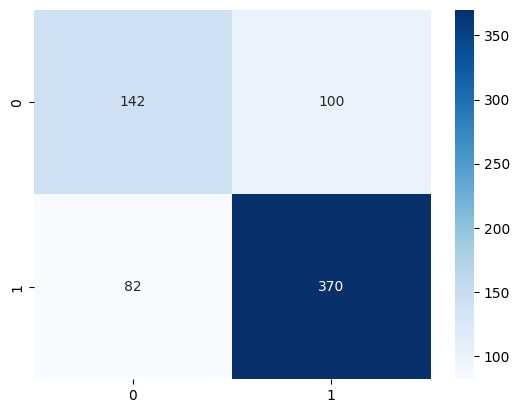

In [376]:
# Confusion matrix heatmap
_ = sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt=".3g", cmap="Blues")